In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

# 1/ Dataset

In [2]:
data_full = pd.read_csv('data_15min_final.csv')
target = data_full['winningTeam']
data = data_full.drop(columns='winningTeam')

In [3]:
data.head()

Team1.championStats.abilityHaste  Team1.championStats.abilityPower  \
0                                 0                               177   
1                                 0                               185   
2                                 0                               186   
3                                 0                               195   
4                                 0                               230   

   Team1.championStats.armor  Team1.championStats.armorPen  \
0                        352                             0   
1                        446                             0   
2                        466                             0   
3                        307                             0   
4                        348                             0   

   Team1.championStats.armorPenPercent  Team1.championStats.attackDamage  \
0                                    0                               628   
1                                    0                               551   
2                                    0                               603   
3                                    0                               746   
4                                   30                               759   

   Team1.championStats.attackSpeed  Team1.championStats.bonusArmorPenPercent  \
0                              817                                         0   
1                              618                                         0   
2                              826                                         0   
3                              945                                         0   
4                              635                                         0   

   Team1.championStats.bonusMagicPenPercent  Team1.championStats.ccReduction  \
0                                         0                               71   
1                                         0                                0   
2                                         0                               30   
3                                         0                               30   
4                                         0                               67   

   ...  Team2.goldPerSecond  Team2.jungleMinionsKilled  Team2.level  \
0  ...                   50                        100           47   
1  ...                   50                         95           46   
2  ...                   50                        104           49   
3  ...                   50                        107           48   
4  ...                   50                         83           46   

   Team2.minionsKilled  Team2.participantId  Team2.position.x  \
0                  421                   40             58227   
1                  402                   40             44645   
2                  389                   40             39313   
3                  385                   40             43743   
4                  370                   40             49966   

   Team2.position.y  Team2.timeEnemySpentControlled  Team2.totalGold  Team2.xp  
0             25880                         1049805            24603     29860  
1             41057                          395210            27729     30281  
2             27933                          730043            31166     31966  
3             50106                          957390            30368     32863  
4             24051                          725235            28765     29713  

[5 rows x 96 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9818 entries, 0 to 9817
Data columns (total 96 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Team1.championStats.abilityHaste                 9818 non-null   int64
 1   Team1.championStats.abilityPower                 9818 non-null   int64
 2   Team1.championStats.armor                        9818 non-null   int64
 3   Team1.championStats.armorPen                     9818 non-null   int64
 4   Team1.championStats.armorPenPercent              9818 non-null   int64
 5   Team1.championStats.attackDamage                 9818 non-null   int64
 6   Team1.championStats.attackSpeed                  9818 non-null   int64
 7   Team1.championStats.bonusArmorPenPercent         9818 non-null   int64
 8   Team1.championStats.bonusMagicPenPercent         9818 non-null   int64
 9   Team1.championStats.ccReduction                  981

Apparently we have only int to treat. Let's verify it.

In [5]:
for varName in data.columns:
    if data[varName].dtype == 'object':
        print(varName)        

In [6]:
data.describe()

Team1.championStats.abilityHaste  Team1.championStats.abilityPower  \
count                            9818.0                       9818.000000   
mean                                0.0                        235.988389   
std                                 0.0                        102.364094   
min                                 0.0                          0.000000   
25%                                 0.0                        161.000000   
50%                                 0.0                        222.000000   
75%                                 0.0                        299.000000   
max                                 0.0                        776.000000   

       Team1.championStats.armor  Team1.championStats.armorPen  \
count                9818.000000                        9818.0   
mean                  367.605419                           0.0   
std                    51.235050                           0.0   
min                   263.000000                           0.0   
25%                   331.000000                           0.0   
50%                   360.000000                           0.0   
75%                   395.000000                           0.0   
max                   726.000000                           0.0   

       Team1.championStats.armorPenPercent  Team1.championStats.attackDamage  \
count                          9818.000000                       9818.000000   
mean                              1.377776                        633.077205   
std                               5.749763                         80.809331   
min                               0.000000                        410.000000   
25%                               0.000000                        575.000000   
50%                               0.000000                        628.000000   
75%                               0.000000                        683.000000   
max                              48.000000                       1092.000000   

       Team1.championStats.attackSpeed  \
count                      9818.000000   
mean                        750.664799   
std                          85.775827   
min                         512.000000   
25%                         690.000000   
50%                         740.000000   
75%                         799.000000   
max                        1283.000000   

       Team1.championStats.bonusArmorPenPercent  \
count                                    9818.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       Team1.championStats.bonusMagicPenPercent  \
count                                    9818.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       Team1.championStats.ccReduction  ...  Team2.goldPerSecond  \
count                      9818.000000  ...          9818.000000   
mean                         23.865349  ...            50.113058   
std                          24.537527  ...             2.596306   
min                         -30.000000  ...             0.000000   
25%                           0.000000  ...            50.000000   
50%                          19.000000  ...            50.000000   
75%                          37.000000  ...            50.000000   
max                         157.000000  ...           100.000000   

       Team2.jungleMinionsKilled  Team2.level  Team2.minionsKilled  \
count          

In [7]:
target

0       1
1       1
2       1
3       0
4       1
       ..
9813    1
9814    1
9815    0
9816    1
9817    0
Name: winningTeam, Length: 9818, dtype: int64

In [8]:
#count nan
data.isnull().sum().any()


False

In [9]:
target.isnull().sum().any()

False

The fact that we are using datas coming from an api ensures we dont have any NaN values

# Dataset's vizualisation

Because of the structure of the dataset (Team1... Team2) and for computing reasons, we will display only the first half of features (Team1 features). And we will consider that they have the same properties for Team2.

In [10]:
#first half of data
data_to_display = data_full.iloc[:, :int(data.shape[1]/2)]

In [11]:
data_to_display

winningTeam  Team1.championStats.abilityHaste  \
0               1                                 0   
1               1                                 0   
2               1                                 0   
3               0                                 0   
4               1                                 0   
...           ...                               ...   
9813            1                                 0   
9814            1                                 0   
9815            0                                 0   
9816            1                                 0   
9817            0                                 0   

      Team1.championStats.abilityPower  Team1.championStats.armor  \
0                                  177                        352   
1                                  185                        446   
2                                  186                        466   
3                                  195                        307   
4                                  230                        348   
...                                ...                        ...   
9813                               334                        307   
9814                               225                        362   
9815                               456                        380   
9816                               188                        393   
9817                               288                        419   

      Team1.championStats.armorPen  Team1.championStats.armorPenPercent  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                   30   
...                            ...                                  ...   
9813                             0                                    0   
9814                             0                                    0   
9815                             0                                    0   
9816                             0                                    0   
9817                             0                                    0   

      Team1.championStats.attackDamage  Team1.championStats.attackSpeed  \
0                                  628                              817   
1                                  551                              618   
2                                  603                              826   
3                                  746                              945   
4                                  759                              635   
...                                ...                              ...   
9813                               867                              512   
9814                               664                              692   
9815                               817                              818   
9816                               651                              798   
9817                               520                              713   

      Team1.championStats.bonusArmorPenPercent  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
9813                                         0   
9814                                         0   
9815                                         0   
9816                                         0   
9817                                         0   

      Team1.championStats.bonusMagicPenPercent  ...  \
0                                            0  ...   
1  

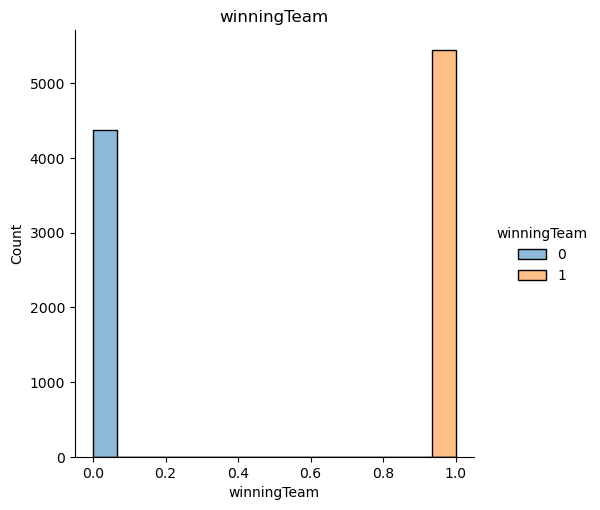

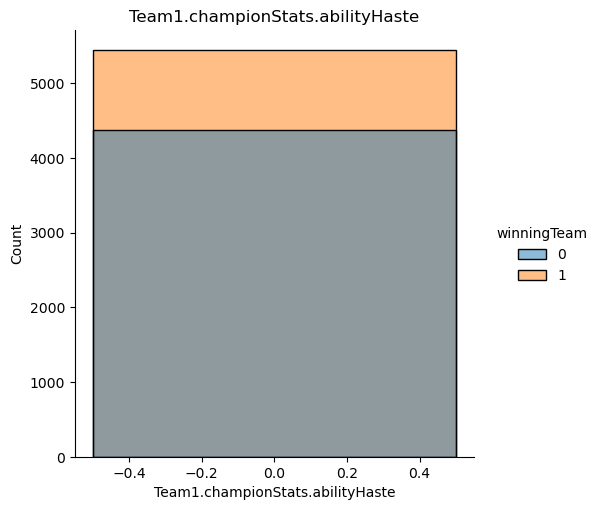

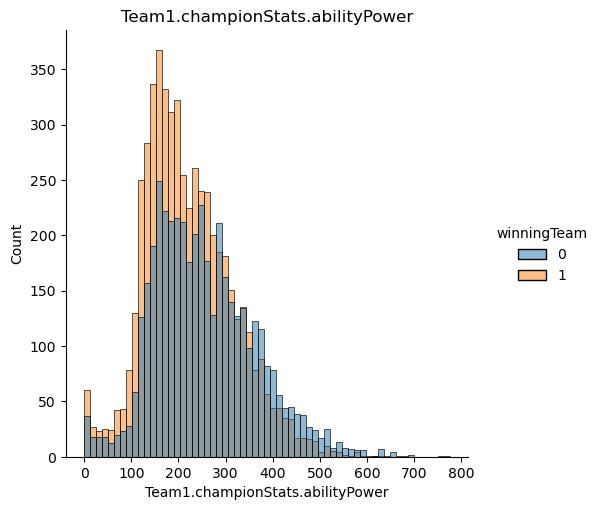

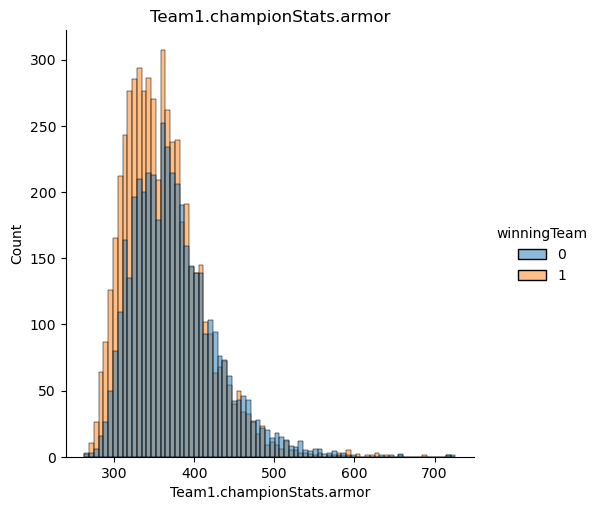

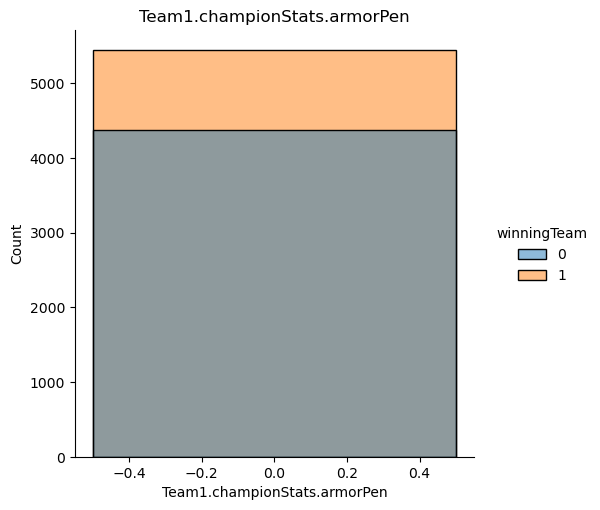

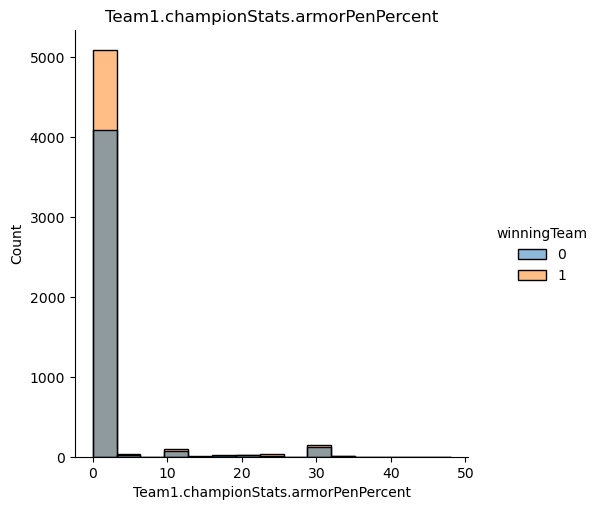

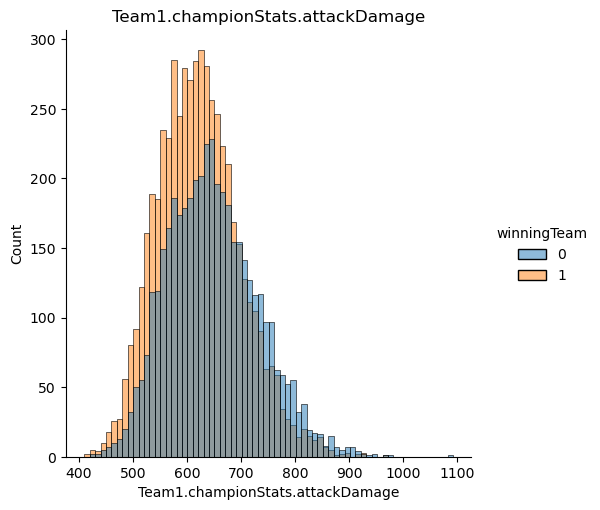

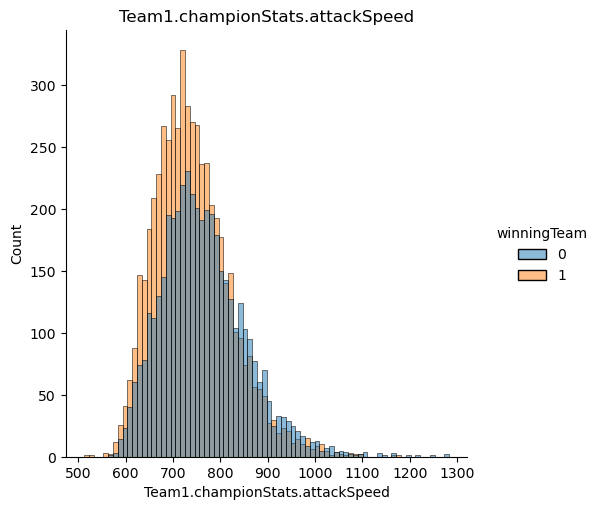

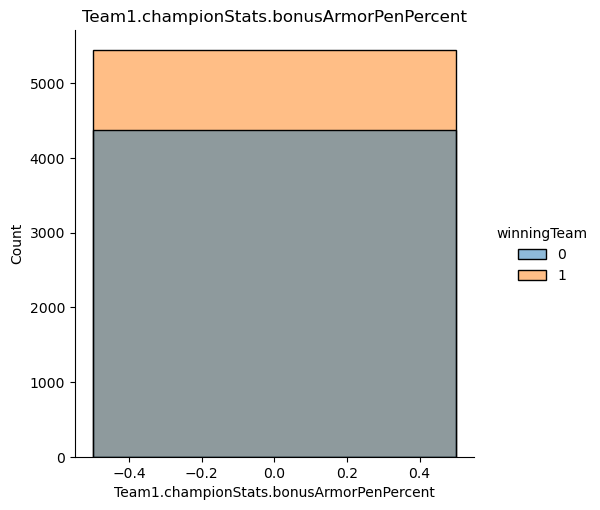

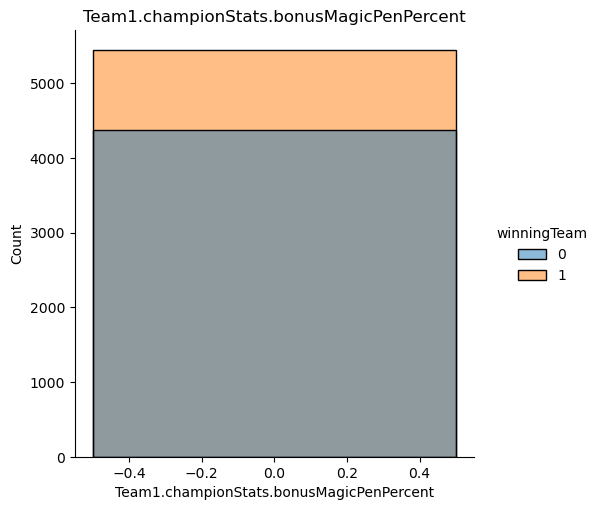

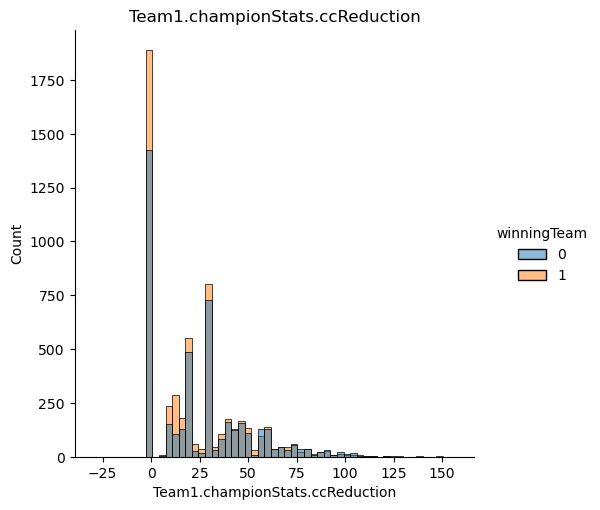

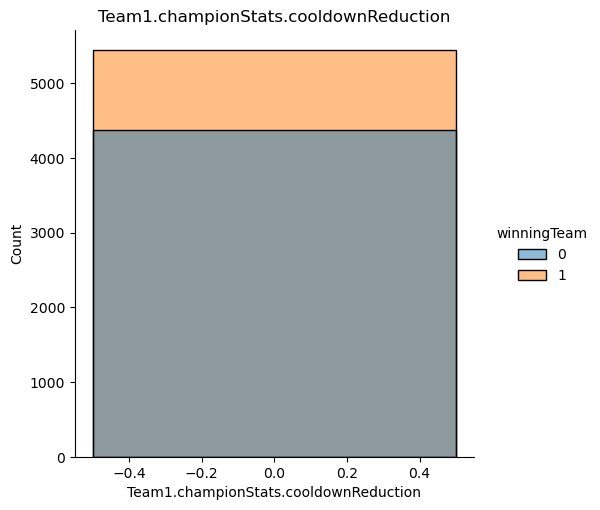

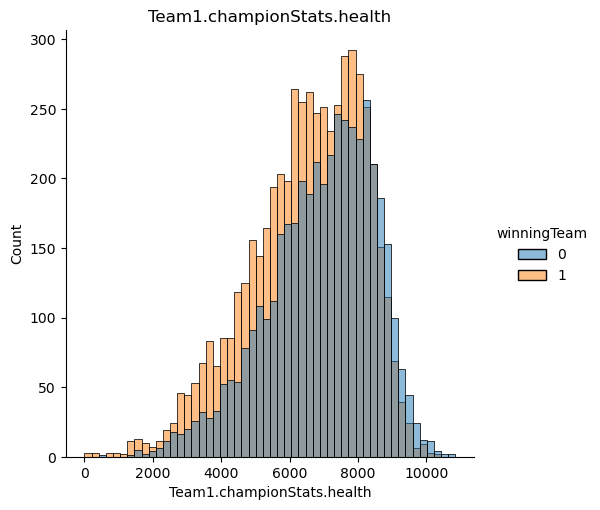

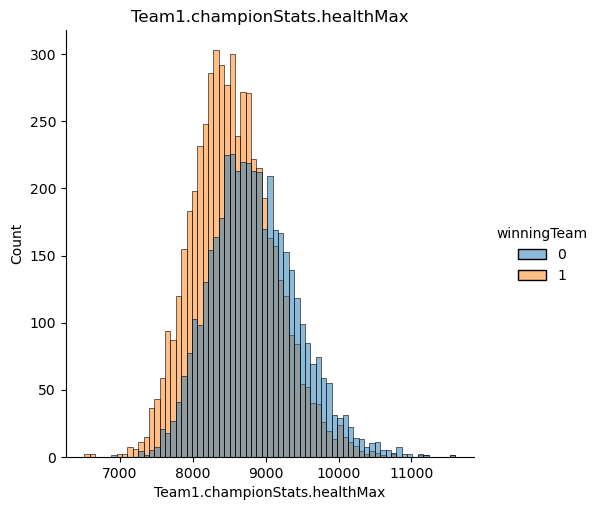

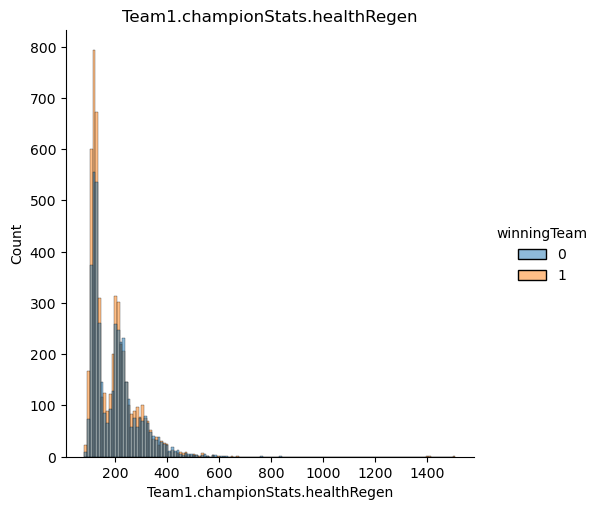

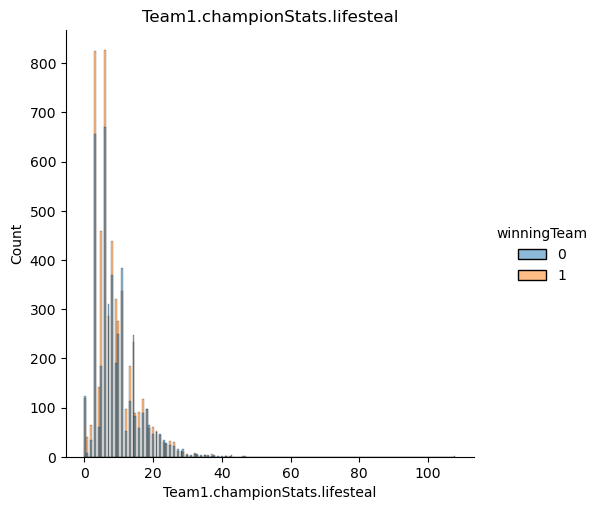

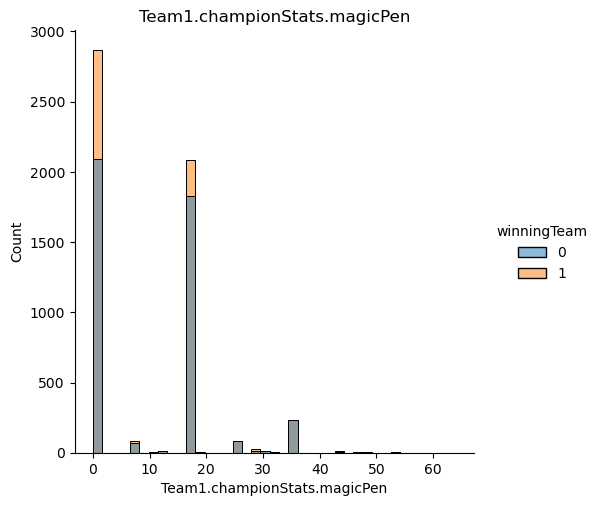

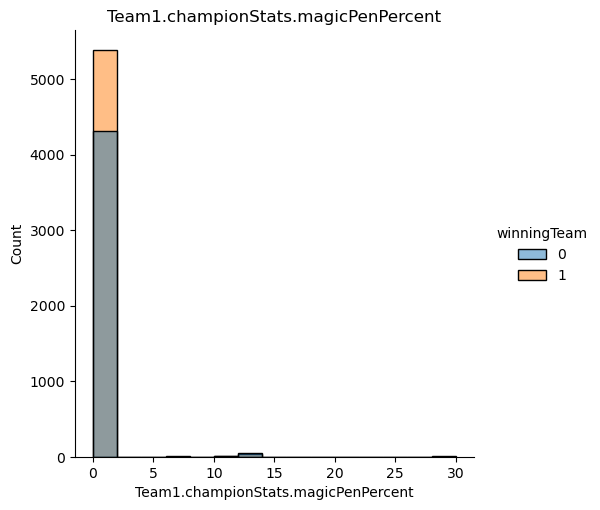

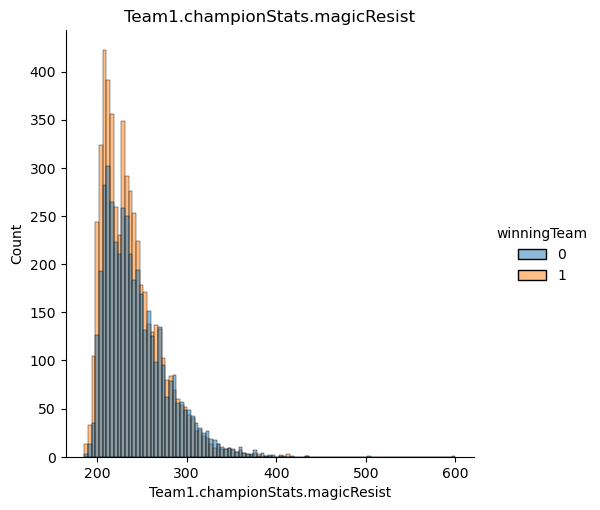

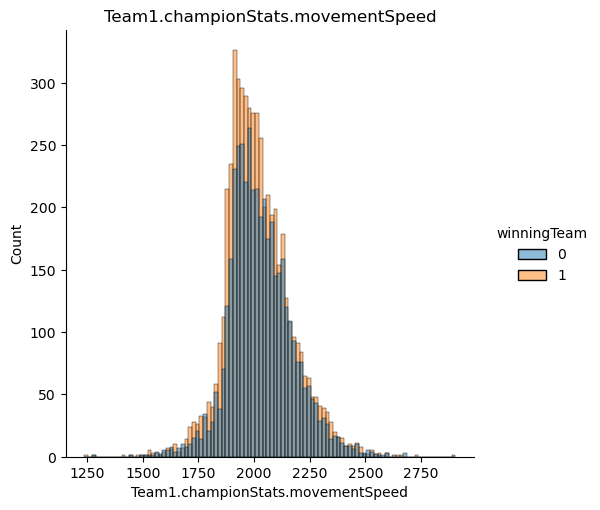

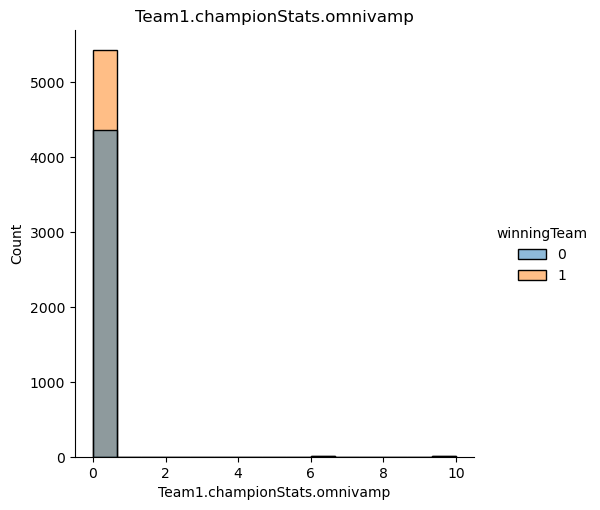

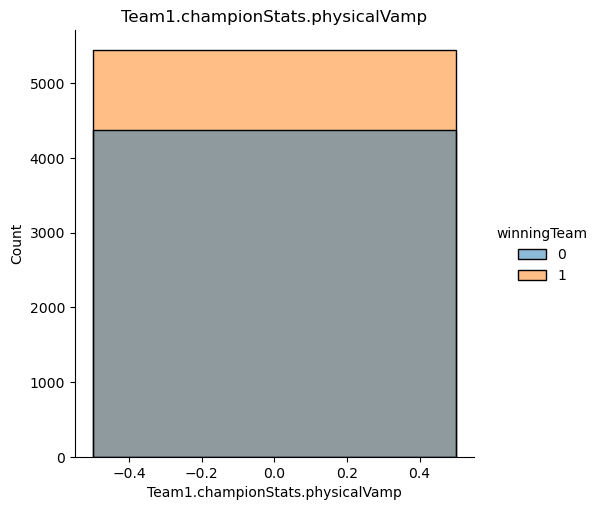

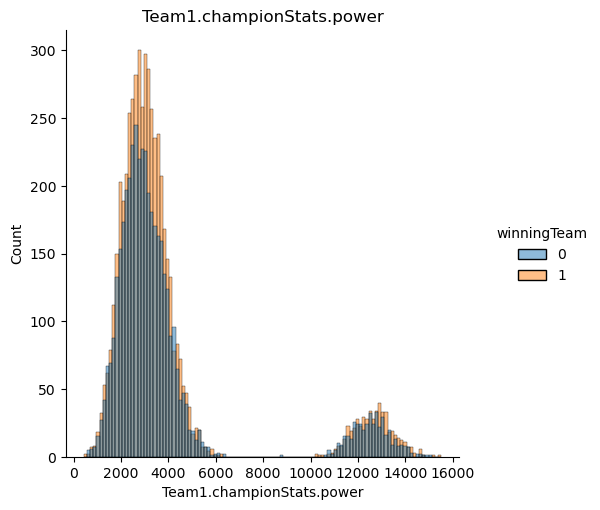

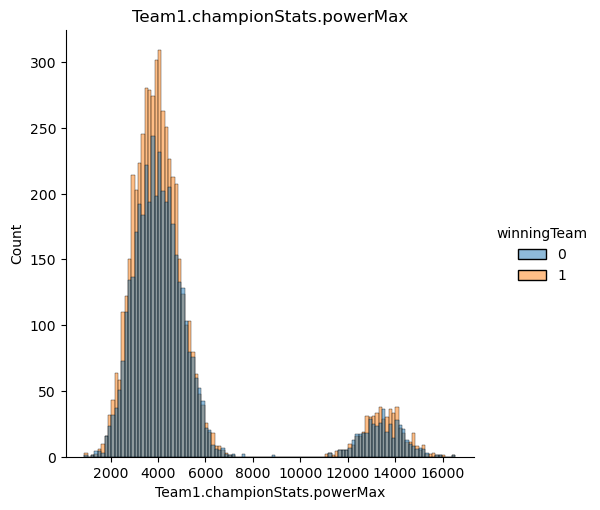

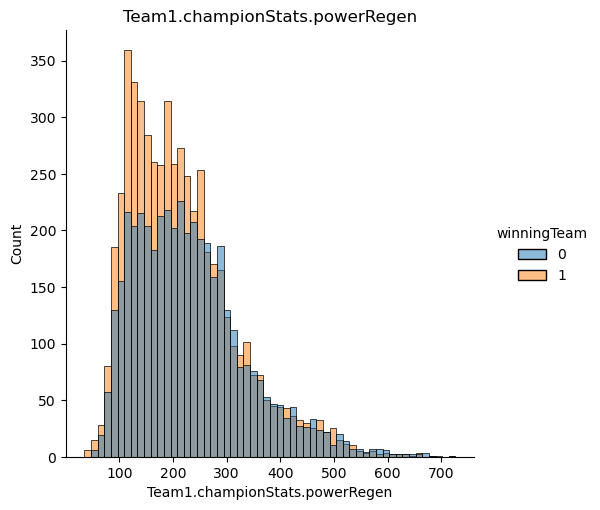

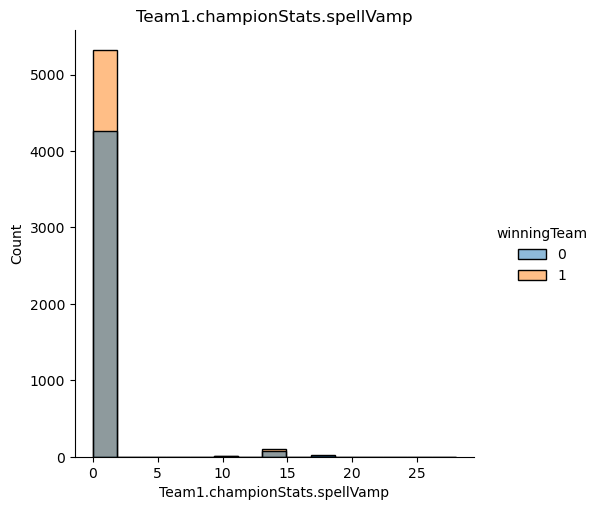

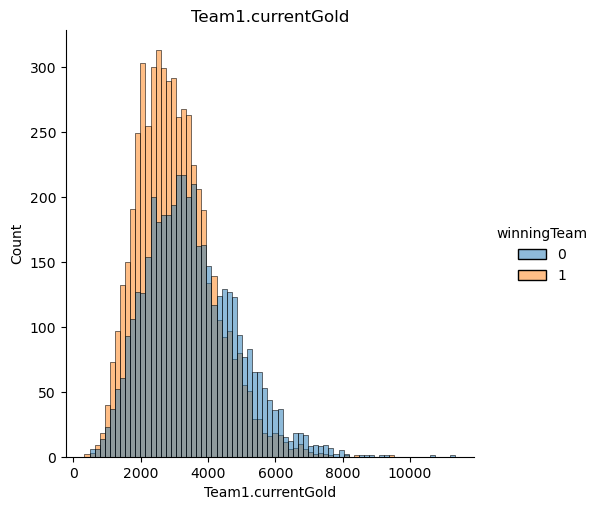

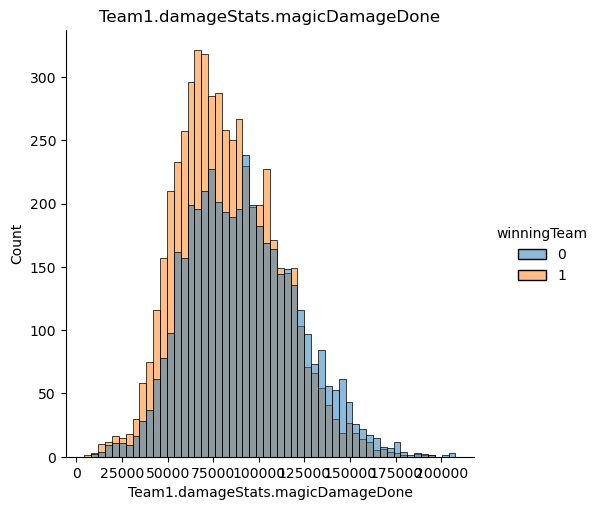

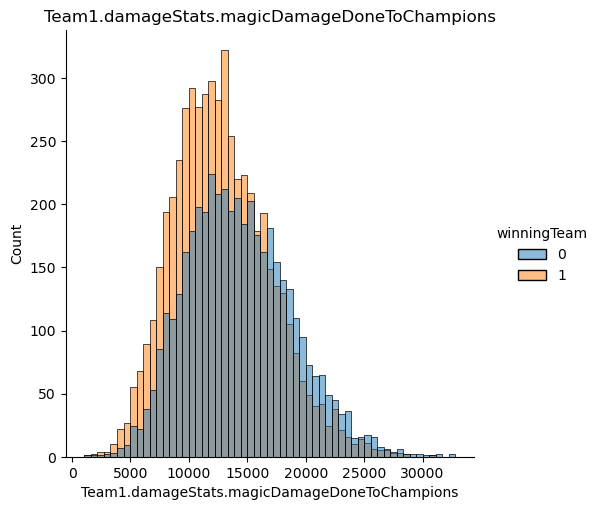

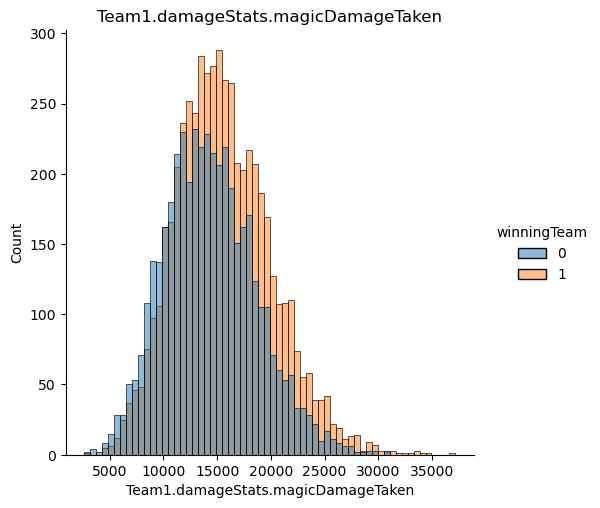

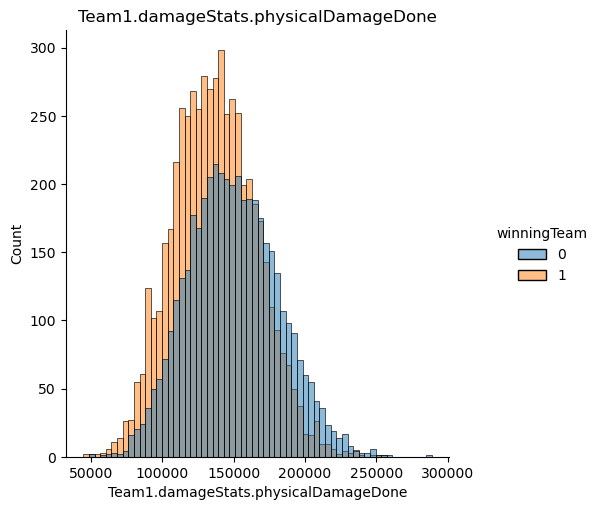

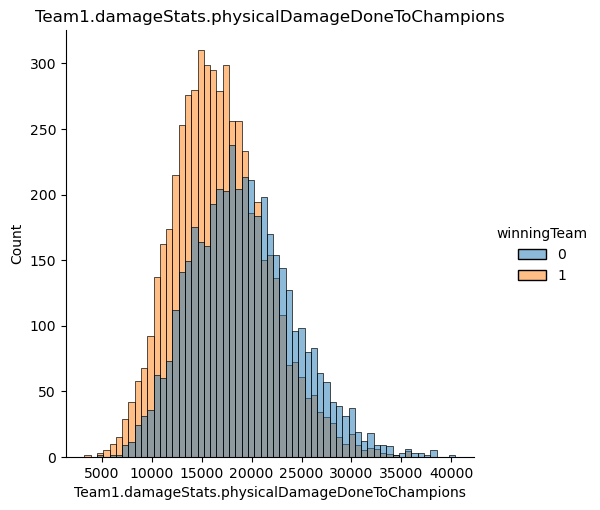

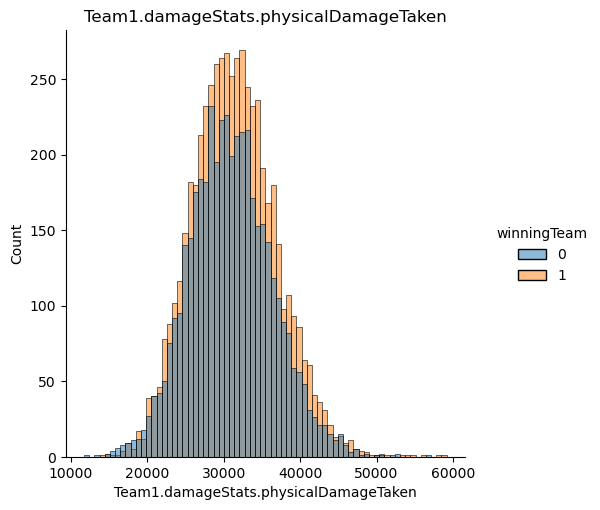

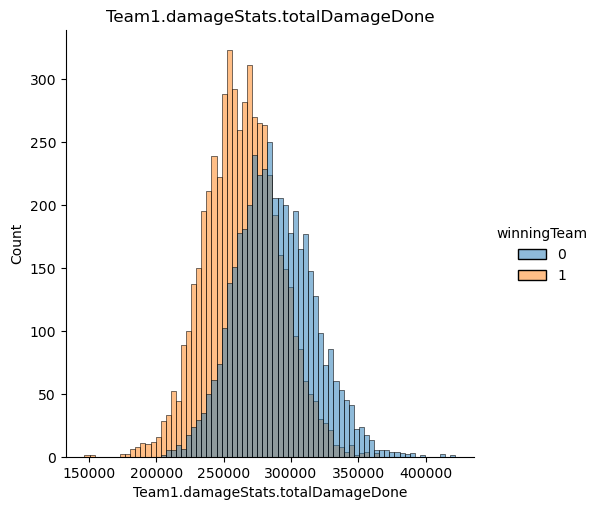

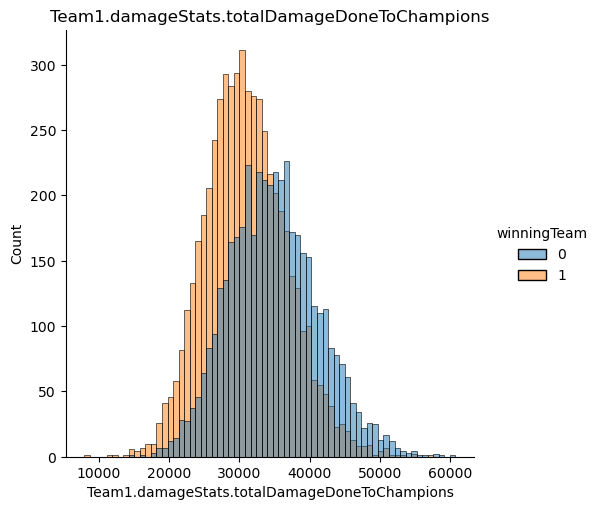

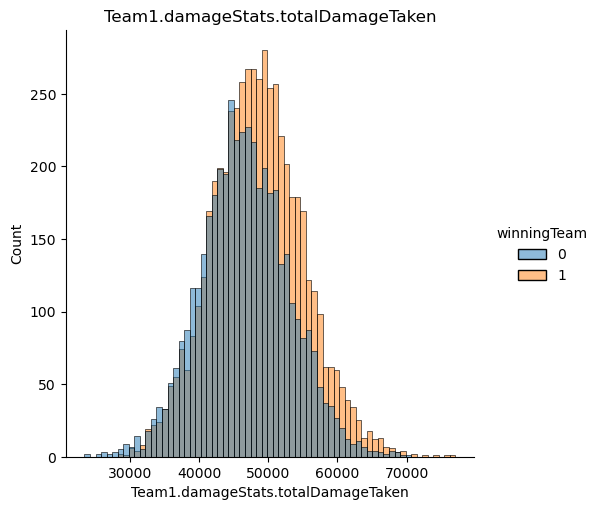

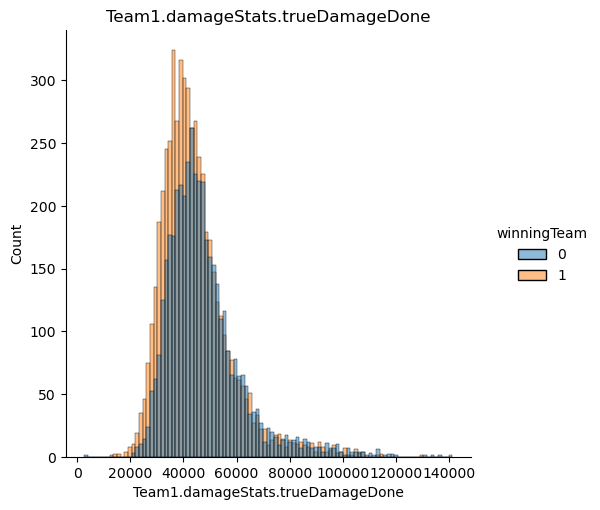

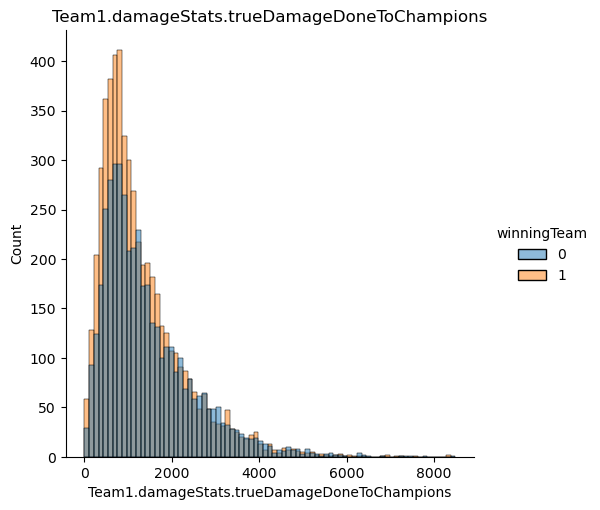

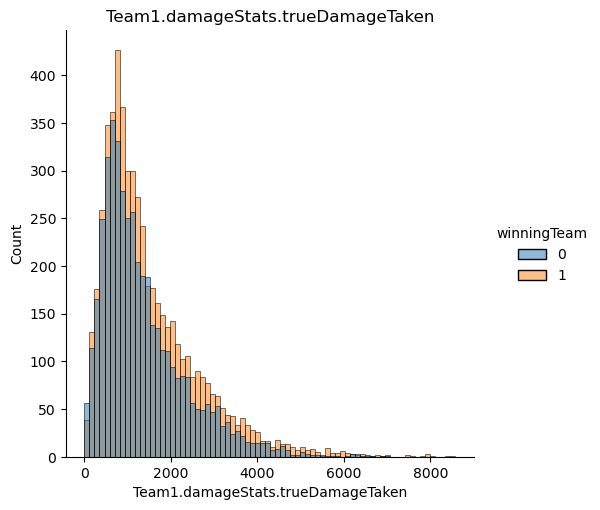

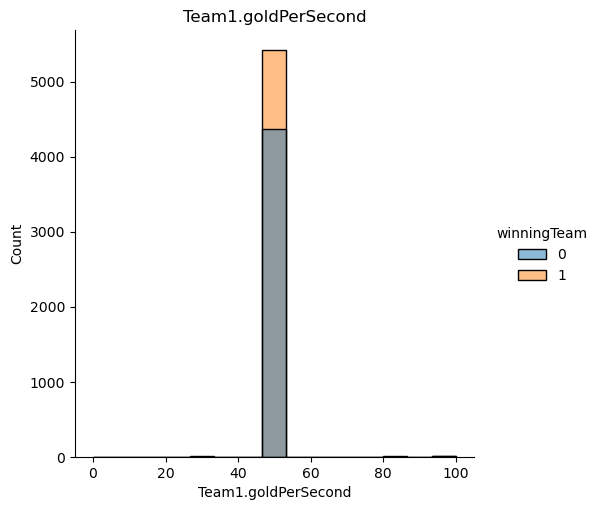

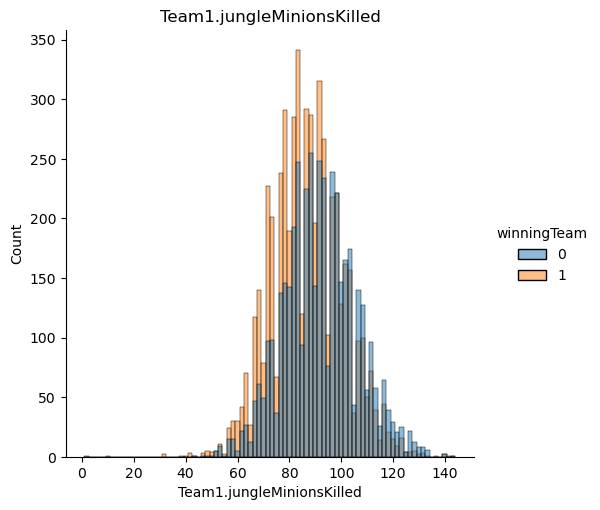

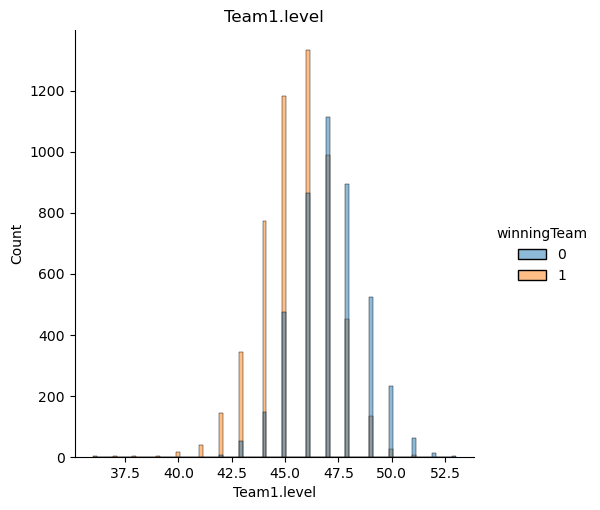

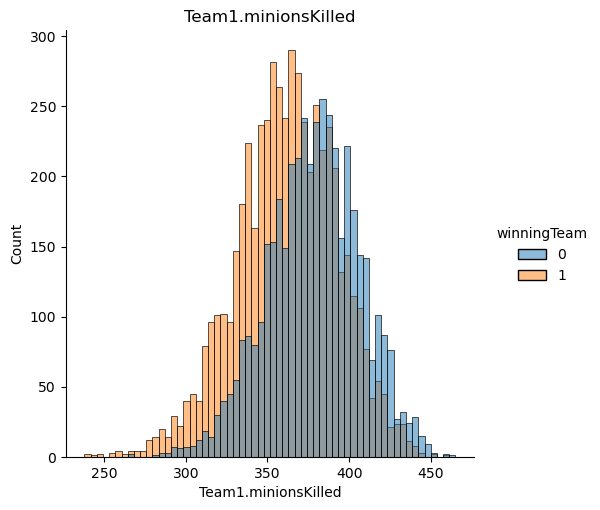

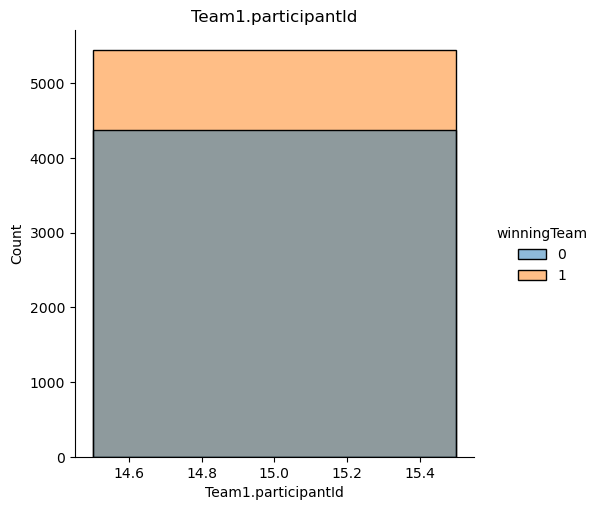

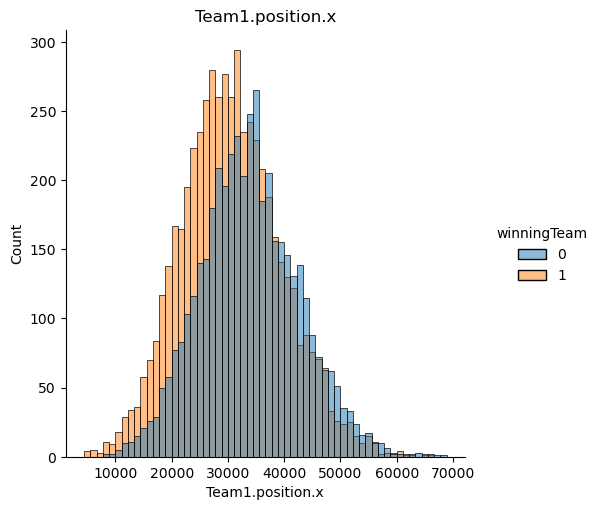

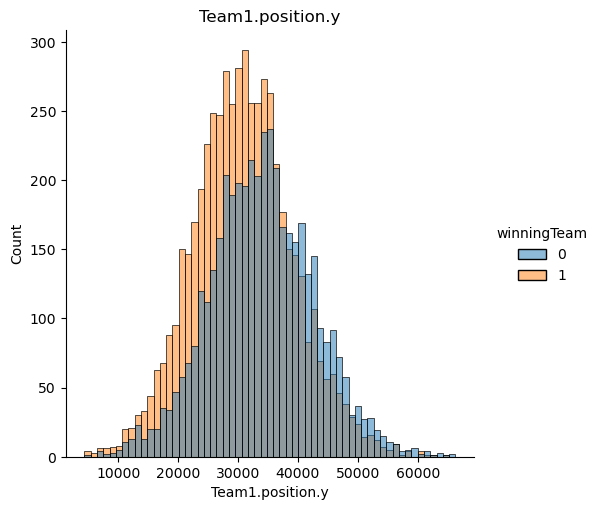

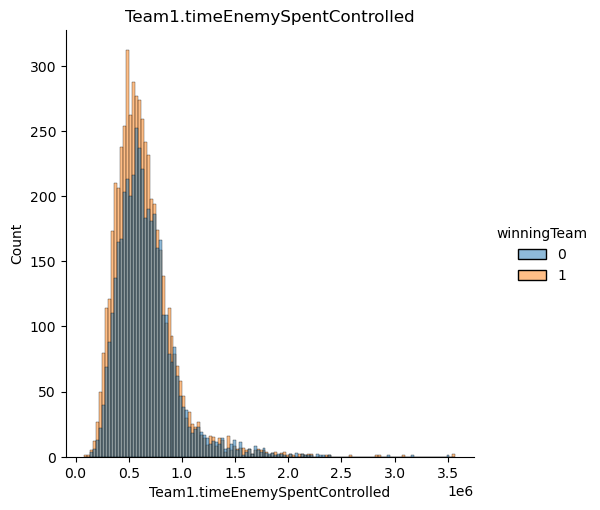

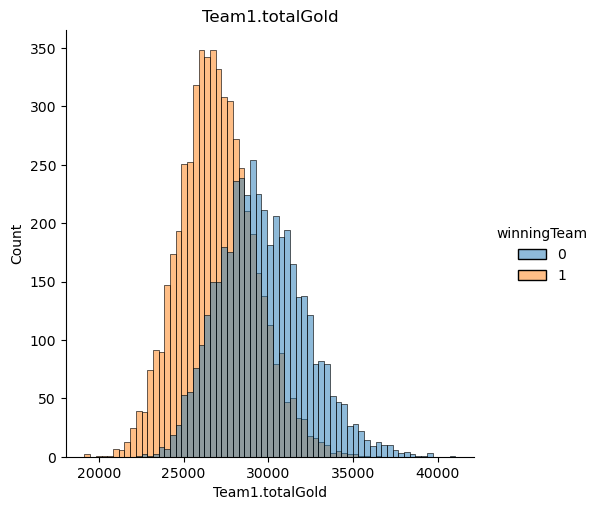

In [12]:
def display_distributions(data):
    data = shuffle(data)
    for column in data.columns:
        sns.displot(data, x=column, hue='winningTeam')
        plt.title(column)
        plt.show()

display_distributions(data_to_display)

We observe quickly that some features are not changing and so will not impact our models. We are making a function that will display them and so we can look more in depth to remove them.

In [13]:
def constant_columns(data):
    return data.columns[data.nunique() == 1]

In [14]:
#Function to display features that dont change in the dataset
def display_constant_features(data):
    print(constant_columns(data))
    for constant_feature in constant_columns(data):
        sns.displot(data, x=constant_feature, hue='winningTeam')
        plt.title(constant_feature)
        plt.show()

In [15]:
constant_columns(data)

Index(['Team1.championStats.abilityHaste', 'Team1.championStats.armorPen',
       'Team1.championStats.bonusArmorPenPercent',
       'Team1.championStats.bonusMagicPenPercent',
       'Team1.championStats.cooldownReduction',
       'Team1.championStats.physicalVamp', 'Team1.participantId',
       'Team2.championStats.abilityHaste', 'Team2.championStats.armorPen',
       'Team2.championStats.bonusArmorPenPercent',
       'Team2.championStats.bonusMagicPenPercent',
       'Team2.championStats.cooldownReduction',
       'Team2.championStats.physicalVamp', 'Team2.participantId'],
      dtype='object')

As we have the exact same useless features for Team1 and Team2 we were right to split in half the dataset to gain some computation time.

We can now delete them as we are sure that they are useless

In [16]:
data.shape

(9818, 96)

In [17]:
data = data.drop(columns=constant_columns(data))

In [18]:
data.shape

(9818, 82)

We have now 82 features instead of 96.

# Scatter plot exploration

Now we want to explore even more the dataset by displaying some scatterplots of the dataset. We will use a function to make it quicker and avoid code duplication.

In [19]:
def plot_custom_graph(title, data_sample, col , xlabel, ylabel):
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.scatter(data_sample["Team1."+col], data_sample["Team2."+col], c=data_sample["winningTeam"], cmap="coolwarm_r", alpha=0.5) #we reverse the color map to have blue for blue team and red for red team
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(['Blue team wins', 'Red team wins']) 
    plt.show()

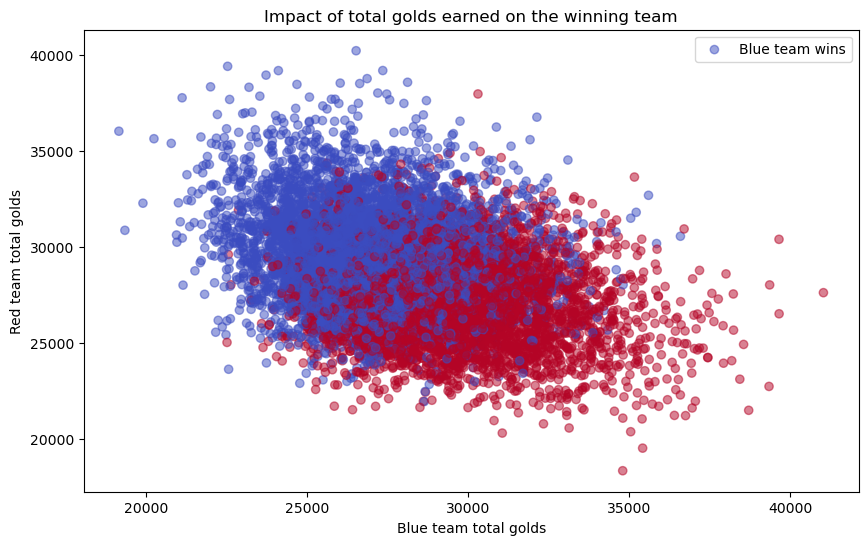

In [20]:
#Impact of total golds earned on the winning team
plot_custom_graph('Impact of total golds earned on the winning team', data_full, 'totalGold', 'Blue team total golds', 'Red team total golds')

League of legends is game heavily influenced by golds as this graph shows.

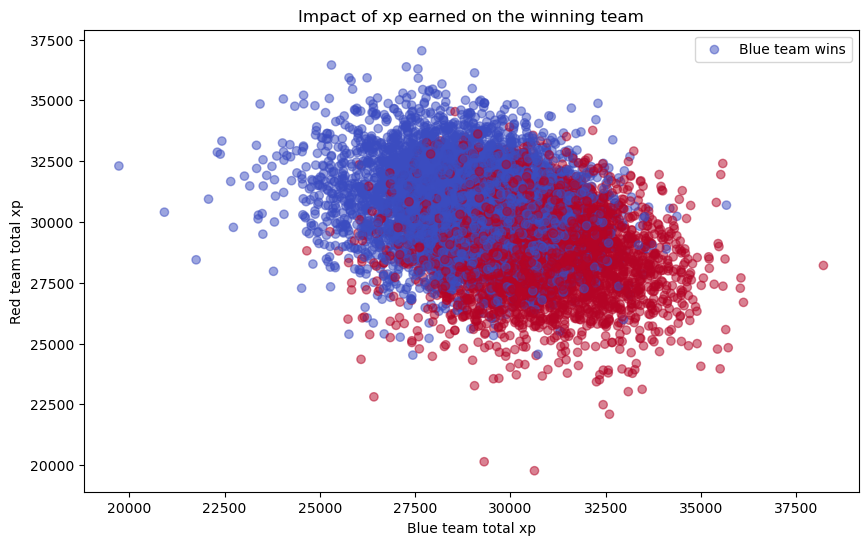

In [21]:
#Impact of total xp earned on the winning team
plot_custom_graph('Impact of xp earned on the winning team', data_full, 'xp', 'Blue team total xp', 'Red team total xp')

It seems that the experience points earned is important 

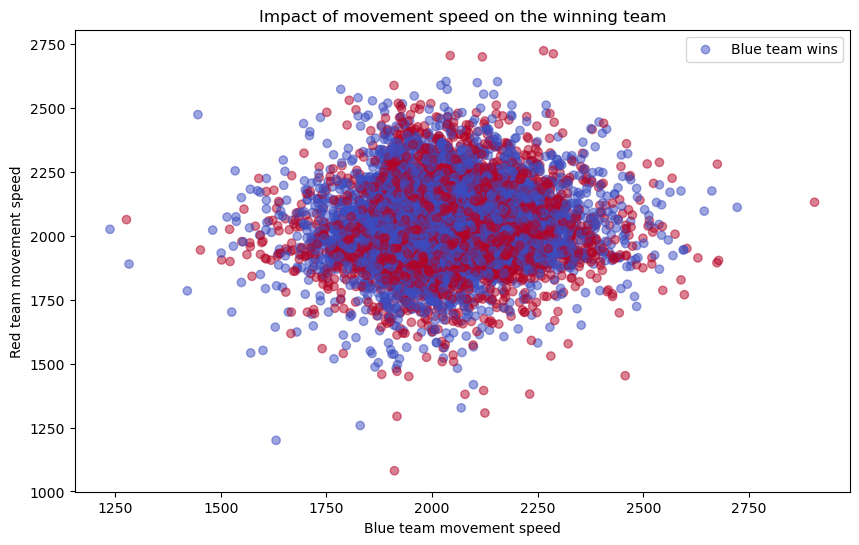

In [22]:
plot_custom_graph('Impact of movement speed on the winning team', data_full, 'championStats.movementSpeed', 'Blue team movement speed', 'Red team movement speed')

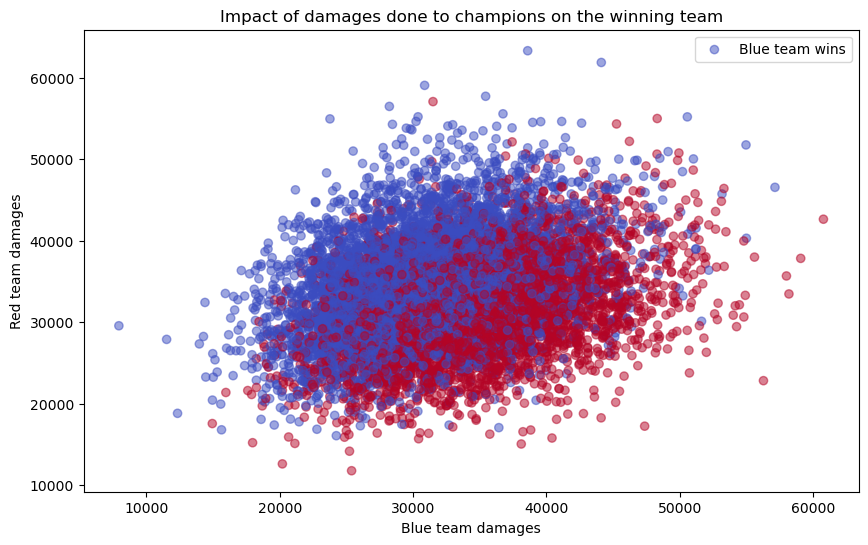

In [23]:
plot_custom_graph('Impact of damages done to champions on the winning team', data_full, 'damageStats.totalDamageDoneToChampions', 'Blue team damages', 'Red team damages')

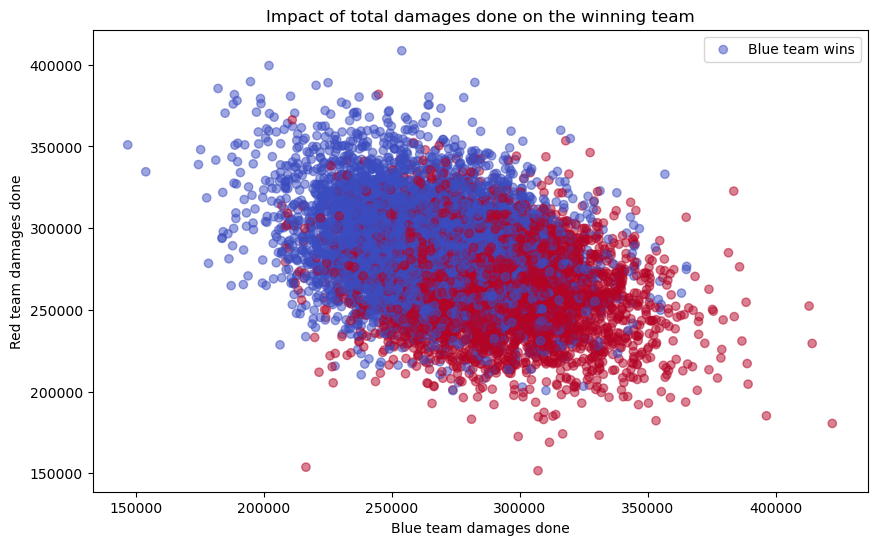

In [24]:
plot_custom_graph('Impact of total damages done on the winning team', data_full, 'damageStats.totalDamageDone', 'Blue team damages done', 'Red team damages done')

# Classifications models

We want to try every single classification models. We are going to use the same dataset split for all of our models. As our problem is to guess if a match is won or lost, we don't really care about false positives ect.. So we will use the accuracy as evaluation metric. We will only need a StandardScaler when needed because we have only numerical features without NaN.

Before spliting, we want to make sure to respect the win/loss ratio for each of our splits.

In [25]:
print(data_full['winningTeam'].value_counts())
print(data_full['winningTeam'].value_counts()[1]/data_full['winningTeam'].value_counts()[0])

1    5439
0    4379
Name: winningTeam, dtype: int64
1.242064398264444


As we can see our dataset isn't really balanced as we have ~1100 more wins than loss for blue team.

In [26]:
from sklearn.model_selection import train_test_split
#Split the dataset into training/validation and testing sets respecting the proportion of the classes
X_train_val, X_test, y_train_val, y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

In [27]:
X_train.shape, X_val.shape, X_test.shape

((6283, 82), (1571, 82), (1964, 82))

I want to be sure we have a well - distributed win/loss ratio for each splits.

In [28]:
print(y_train.value_counts())
print(y_train.value_counts()[1]/y_train.value_counts()[0])

1    3481
0    2802
Name: winningTeam, dtype: int64
1.2423269093504639


In [29]:
print(y_val.value_counts())
print(y_val.value_counts()[1]/y_val.value_counts()[0])

1    870
0    701
Name: winningTeam, dtype: int64
1.2410841654778888


In [30]:
print(y_test.value_counts())
print(y_test.value_counts()[1]/y_test.value_counts()[0])

1    1088
0     876
Name: winningTeam, dtype: int64
1.2420091324200913


Now that we have good splitted set of data, we can now use models. We can try to look which models will fit our problem the best.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Models testing

We are going to test the vanilla models from sklearn to have a first look of the best ones.
 - 1. Logistic Regression
 - 2. kNN
 - 3. SVM
 - 4. Random Forest
 - 5. Gradient boosting forest


In [116]:
"""
    Function to test the performance of a model with a cross-validation on a validation set 
"""

def test_model(model, X_train, y_train, X_val, y_val, transform=False, cv=5, verbose=False, scoring='accuracy'):
    pip = make_pipeline(StandardScaler(), model) if transform else model
    pip.fit(X_train, y_train)
    
    scores = cross_val_score(pip, X_train, y_train, cv=cv, scoring=scoring)
    if verbose:
        print(pip)
        print('Cross-validation scores:', scores)
        print('Mean cross-validation score:', scores.mean().round(3), '+-', scores.std().round(3))
        print(classification_report(y_val, pip.predict(X_val)))
        plt.figure()
        sns.heatmap(confusion_matrix(y_val, pip.predict(X_val)), annot=True, fmt='d')
        plt.show()
    print('Validation score:', pip.score(X_val, y_val).round(6))
    
    
    return pip

1 - Logistic Regression:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])
Cross-validation scores: [0.78122514 0.75099443 0.74701671 0.76353503 0.77308917]
Mean cross-validation score: 0.763 +- 0.013
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       701
           1       0.78      0.79      0.79       870

    accuracy                           0.76      1571
   macro avg       0.76      0.76      0.76      1571
weighted avg       0.76      0.76      0.76      1571



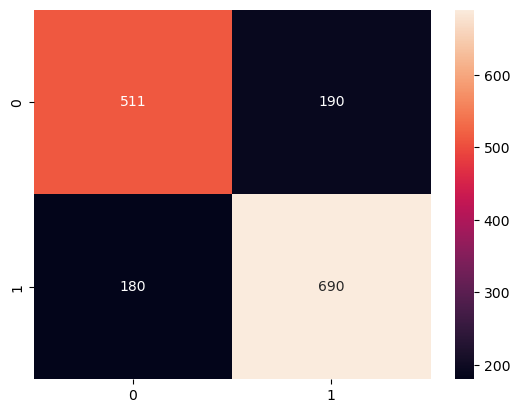

Validation score: 0.764481


In [117]:
print("1 - Logistic Regression:")
log_reg = test_model(LogisticRegression(), X_train, y_train, X_val, y_val, transform=True, verbose=True)


In [91]:
print("2 - kNN:")
knn = test_model(KNeighborsClassifier(), X_train, y_train, X_val, y_val)

2 - kNN:
Validation score: 0.661999


In [92]:
print("3 - SVM:")
svm = test_model(SVC(), X_train, y_train, X_val, y_val, transform=True, verbose=True)

3 - SVM:
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])
Cross-validation scores: [0.77326969 0.75099443 0.73587908 0.76035032 0.75557325]
Mean cross-validation score: 0.755 +- 0.012
Validation score: 0.745385


In [93]:
print("4 - Random Forest:")
rf = test_model(RandomForestClassifier(), X_train, y_train, X_val, y_val, verbose=True)

4 - Random Forest:
RandomForestClassifier()
Cross-validation scores: [0.78281623 0.74463007 0.74463007 0.76353503 0.75796178]
Mean cross-validation score: 0.759 +- 0.014
Validation score: 0.765754


In [94]:
print("5 - Gradient Boosting:")
gb = test_model(GradientBoostingClassifier(), X_train, y_train, X_val, y_val, verbose=True)

5 - Gradient Boosting:
GradientBoostingClassifier()
Cross-validation scores: [0.77645187 0.74781225 0.73587908 0.75875796 0.76751592]
Mean cross-validation score: 0.757 +- 0.014
Validation score: 0.767027


In [39]:
pip = make_pipeline(StandardScaler(), LogisticRegression()) #Create a pipeline with a standard scaler and a logistic regression
cross_val_score(pip, X_train_val, y_train_val, cv=5, scoring='accuracy').mean() #Cross validation score
print(cross_val_score(pip, X_train_val, y_train_val, cv=5, scoring='accuracy').mean())

0.762538202370189



# Logistic regression

In [33]:

import warnings
warnings.filterwarnings('ignore') #We remove warnings to have a cleaner output
pip = make_pipeline(StandardScaler(), LogisticRegression()) #Create a pipeline with a standard scaler and a logistic regression


parameters = {'logisticregression__penalty': ['l1', 'l2', 'none'], 
              'logisticregression__l1_ratio': [0.01, 0.025, 0.05, 0.075, 0.1, 0.2],  
              'logisticregression__C': [0.01,0.25, 0.05, 0.075, 0.1],
              'logisticregression__max_iter' : [10, 50, 100, 150, 250, 500],
            }

grid_search = GridSearchCV(pip, param_grid=parameters, scoring='accuracy',cv=5, n_jobs=-1)

This grid is te result of a 5 iterations of interpolating between best parameters.

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.25, 0.05, 0.075,
                                                   0.1],
                         'logisticregression__l1_ratio': [0.01, 0.025, 0.05,
                                                          0.075, 0.1, 0.2],
                         'logisticregression__max_iter': [10, 50, 100, 150, 250,
                                                          500],
                         'logisticregression__penalty': ['l1', 'l2', 'none']},
             scoring='accuracy')

In [35]:
grid_search.best_params_

{'logisticregression__C': 0.05,
 'logisticregression__l1_ratio': 0.01,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l2'}

In [97]:
grid_search.best_score_

0.7636495497823652

On a un modèle très fiable : 0.005 de standard deviation sur le mean_test_score. On regarde maintenant l'accuracy que ce meilleur estimator nous donne :

In [10]:
#Comparaison des résultats sur le jeu de test
print(f"Accuracy : {grid_search.score(X_test,y_test)*100:.2f}%") #test sur le vrai jeu de test

Accuracy : 75.87%


Ce faible écart d'accuracy nous montre une nouvelle fois que notre modèle généralise bien.

# Jalon 3: Forêts Aléatoires


Ce jalon est divisé en 4 etapes:

1) Calibrages des hyperparamètres les plus importants de notre algorithme.
2) Mesure d'importance de nos variables explicatives.
3) Utiliser notre mesure d'importance des variables explicatives et observer son impact le temps d'apprentissage et d'inférence.
4) Comparer les performances entre nos deux modèles


# Mise en place:
On commence par importer les librairies utilisées:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsµ
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


On importe les données obtenues durant le jalon 1:

In [3]:
data = pd.read_csv('data_15min_final.csv')
target = data['winningTeam']
data.drop(columns='winningTeam', inplace=True)

In [4]:
X_trainval, X_test, y_trainval, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

On divise nos données en 3:

-Un jeu de données d'apprentissage pour entrainer le modèle. Il représente 3/5 du jeu de données.

-Un jeu de données de validation (pour la mesure d'importance des variables explicatives). Il représente 1/5 du jeu de données.

-Un jeu de données test pour évaluer les performances du modèle. Il représente 1/5 du jeu de données.



# Calibrage des hyperparamètres:

Les deux hyperparamètres les plus importants à calibrer sont:

-n_iterators: le nombre d'arbres présents dans la foret

-max_features: le nombre de variables explicatives considérées à chaque coupure.

Afin de les calibrer, nous allons observer l'évolution de l'erreur out-of-bag lors de l'apprentissage de plusieurs forêts aléatoires ayant des valeurs pour ces deux hyperparamètres variant pour chaque forêt.

Cette erreur nous permet de calibrer nos hyperparamètres sans avoir besoin d'utiliser de jeu de données de validation.

On commence par définir les valeurs considérées pour n_estimators et max_features:

In [14]:
# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 2000
a_max_features =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
estimators_step=200

Ensuite on établit nos fonctions pour enregister l'erreur OOB et pour visualiser.

In [15]:
"""
Fonction pour enregistrer l'erreur oob de plusieurs forets aleatiores en variant les hyperparametres.
min_estimators: (int) defini la valeur minimal de n_estimators que l'on considere.
max_estimators: (int) defini la valeur maximal de n_estimators que l'on considere.
estimators_step: (int) denini le pas avec lequel on traverse l'interval des valeurs de n_estimators, defini par min_estimators et max_estimators, que l'on considere
max_features: (list[float])) defini toutes les valeurs de max_features que l'on considere.
output: list[tuple[string, tuple[int, float]]] une liste avec les erreurs associees a differente variante de n_estimators et max_features.
"""
def compute_oob_error_rate(min_estimators, max_estimators, estimators_step, max_features):
    error_rate = []
    for max_f in max_features:
        label = "max_features=" + str(max_f)
        #Warm start pour que empecher le parallelisme afin de pouvoir bien observer l'erreur OOB
        cf = RandomForestClassifier(warm_start=True, max_features=max_f, oob_score=True, random_state=42, n_jobs=-1)
        error_list = []
        for i in range(min_estimators, max_estimators + 1, estimators_step):
            cf.set_params(n_estimators=i)
            #On utilise notre jeu de donnees d'apprentissage
            cf.fit(X_train, y_train)
            oob_error = 1 - cf.oob_score_
            error_list.append((i, oob_error))
        error_rate.append((label, error_list))
        #print pour monitorer lors de l'execution
        print(max_f)
    print("Complete :)")
    return error_rate

"""
Fonction pour representer graphiquement le resultat de compute_oob_error_rate.
error_rate: list[tuple[string, tuple[int, float]]] une liste avec les erreurs associees a differente variante de n_estimators et max_features.
min_estimators: (int) defini la valeur minimal de n_estimators que l'on considere.
max_estimators: (int) defini la valeur maximal de n_estimators que l'on considere.
output: None
"""
def display_oob_error_rate(error_rate, min_estimators, max_estimators):
    for label, error_list in error_rate:
        xs, ys = zip(*error_list)
        plt.plot(xs, ys, label=label)
    plt.xlim(min_estimators, max_estimators)
    plt.title("Evolution de l'erreur out-of-bag en fonction du nombre d'estimateurs")
    plt.xlabel("n_estimators")
    plt.ylabel("OOB error rate")
    plt.legend(loc="upper right")
    plt.show()   

On calcule les erreurs:

In [16]:
error_oob = compute_oob_error_rate(min_estimators, max_estimators, estimators_step, a_max_features)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
Complete :)


On affiche les résultats:

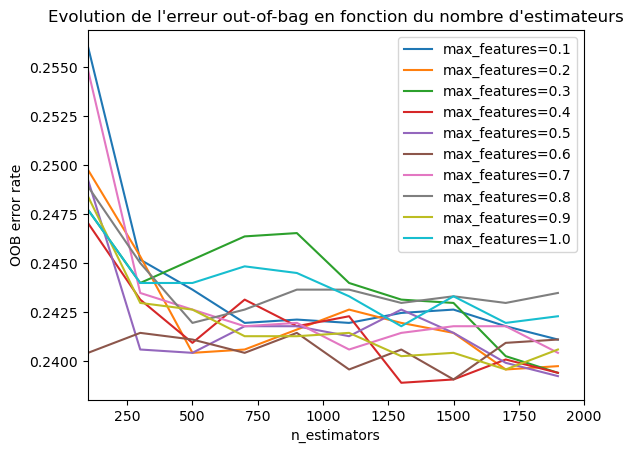

In [17]:
display_oob_error_rate(error_oob, min_estimators, max_estimators)

# Observations sur l'erreur out-of-bag:

On remarque que l'erreur out-of-bag semble plus basse lorsque max_features = 0.5. C'est à dire que les arbres décisionnels ne considèrent que la moitié des variables explicatives lors de chaques coupures.

Concernant n_estimators, le nombre d'arbres d'une forêt, on voit que l'erreur diminue fortement de 100 à environ 500, mais que cette diminution ralentie, voir meme stagne, au delà. 

Afin de confirmer ces deux observations, nous allons augmenter le seuil maximum des valeurs de n_estimators considérées à 5000.

In [18]:
min_estimators = 100
max_estimators = 5000
a_max_features =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
estimators_step=500

In [19]:
error_oob = compute_oob_error_rate(min_estimators, max_estimators, estimators_step, a_max_features)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
Complete :)


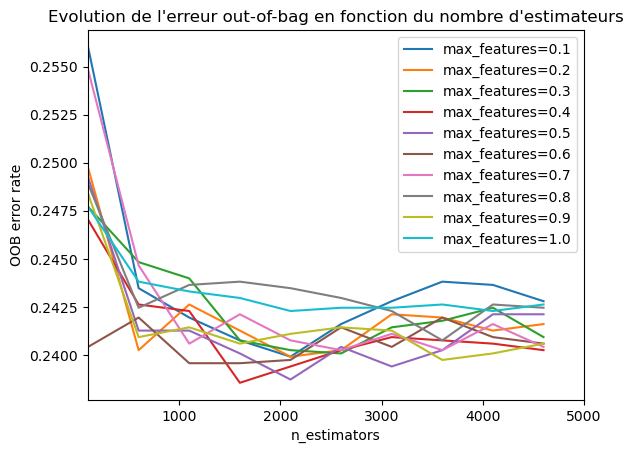

In [20]:
display_oob_error_rate(error_oob, min_estimators, max_estimators)

On voit bien le plateau, il est inutile de continuer au dela de 2000 estimators.

On considèrera donc n_estimators = 1500 et max_features = 0.5

In [21]:
#Librairie pour mesurer le temps d'exécution
import time

Nous allons donc comparer les paramètres par défauts de sci kit (n_estimators = 100, max_features = sqrt(d)) et nos paramètres qui sont censés donner de meilleurs résultats. 
On va retirer le random state pour pouvoir généraliser sur 10 itérations et pour aussi pouvoir mesurer les temps d'apprentissage.

In [22]:
#RandomForest par défaut
time_start = time.time()
defaults_oob = []
for i in range(1, 11):
    rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
    rf.fit(X_train, y_train)
    defaults_oob.append(rf.oob_score_)
time_end = time.time()
default_time = time_end - time_start

In [23]:
#RandomForest avec max_features=0.5 et n_estimators=1500
time_start = time.time()
best_oob = []
for i in range(1, 11):
    rf = RandomForestClassifier(oob_score=True, n_estimators=1500, max_features=0.5, n_jobs=-1)
    rf.fit(X_train, y_train)
    best_oob.append(rf.oob_score_)
time_end = time.time()
best_time = time_end - time_start

In [24]:
print(f"Default RandomForest score: {np.mean(defaults_oob):.3f} en {default_time/10:.2f} secondes en average")
print(f"Best RandomForest score: {np.mean(best_oob):.3f} en {best_time/10:.2f} secondes en average")

Default RandomForest score: 0.749 en 0.32 secondes en average
Best RandomForest score: 0.758 en 16.90 secondes en average


Notre forêt aléatoire est donc légèrement meilleure. Il faut par contre concéder un peu de temps de calcul.

# Mesure d'importance des variables explicatives:

Pour cela, nous allons utiliser la permutation de variables avec la MDA (mean decrease in accuracy).

Ca nous permet de quantifier l'importance des variables pour notre forêt aléatoire.

Les avantages sont que cette démarche est model-agnostic et donc peut s'appliquer a notre forêt aléatoire.

Aussi, elle s'applique plusieurs fois sur chaque variables, ce qui nous donne une meilleure idée de leur importance.

Cela nous permettera d'identifier les variables explicatives le moins corrélées avec notre variable de reponse (winning team).

On utilise notre jeu de donnees de validation pour mesurer l'importance afin de réduire les chances de surapprentissage.

On utilise la MDA plutot que la MDI car celle-ci peut etre biaisé et favorise les variable avec un haute cardinalité.

Notre problème n'étant pas d'envergure énorme le coût de calcul que les permutations engendrent sont correctes : 

In [6]:
#MDA par permutation
from sklearn.inspection import permutation_importance
rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, n_jobs=-1)
rf.fit(X_train, y_train)
result = permutation_importance(rf, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

On crée un fonction pour pouvoir visualiser l'importance des variables explicatives:

In [25]:
def plot_feature_importances(importances, names, model_type):
    feature_importances = importances
    feature_names = names

    data={'feature_names':feature_names,'feature_importance':feature_importances}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,20))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')

On observe nos résultats:

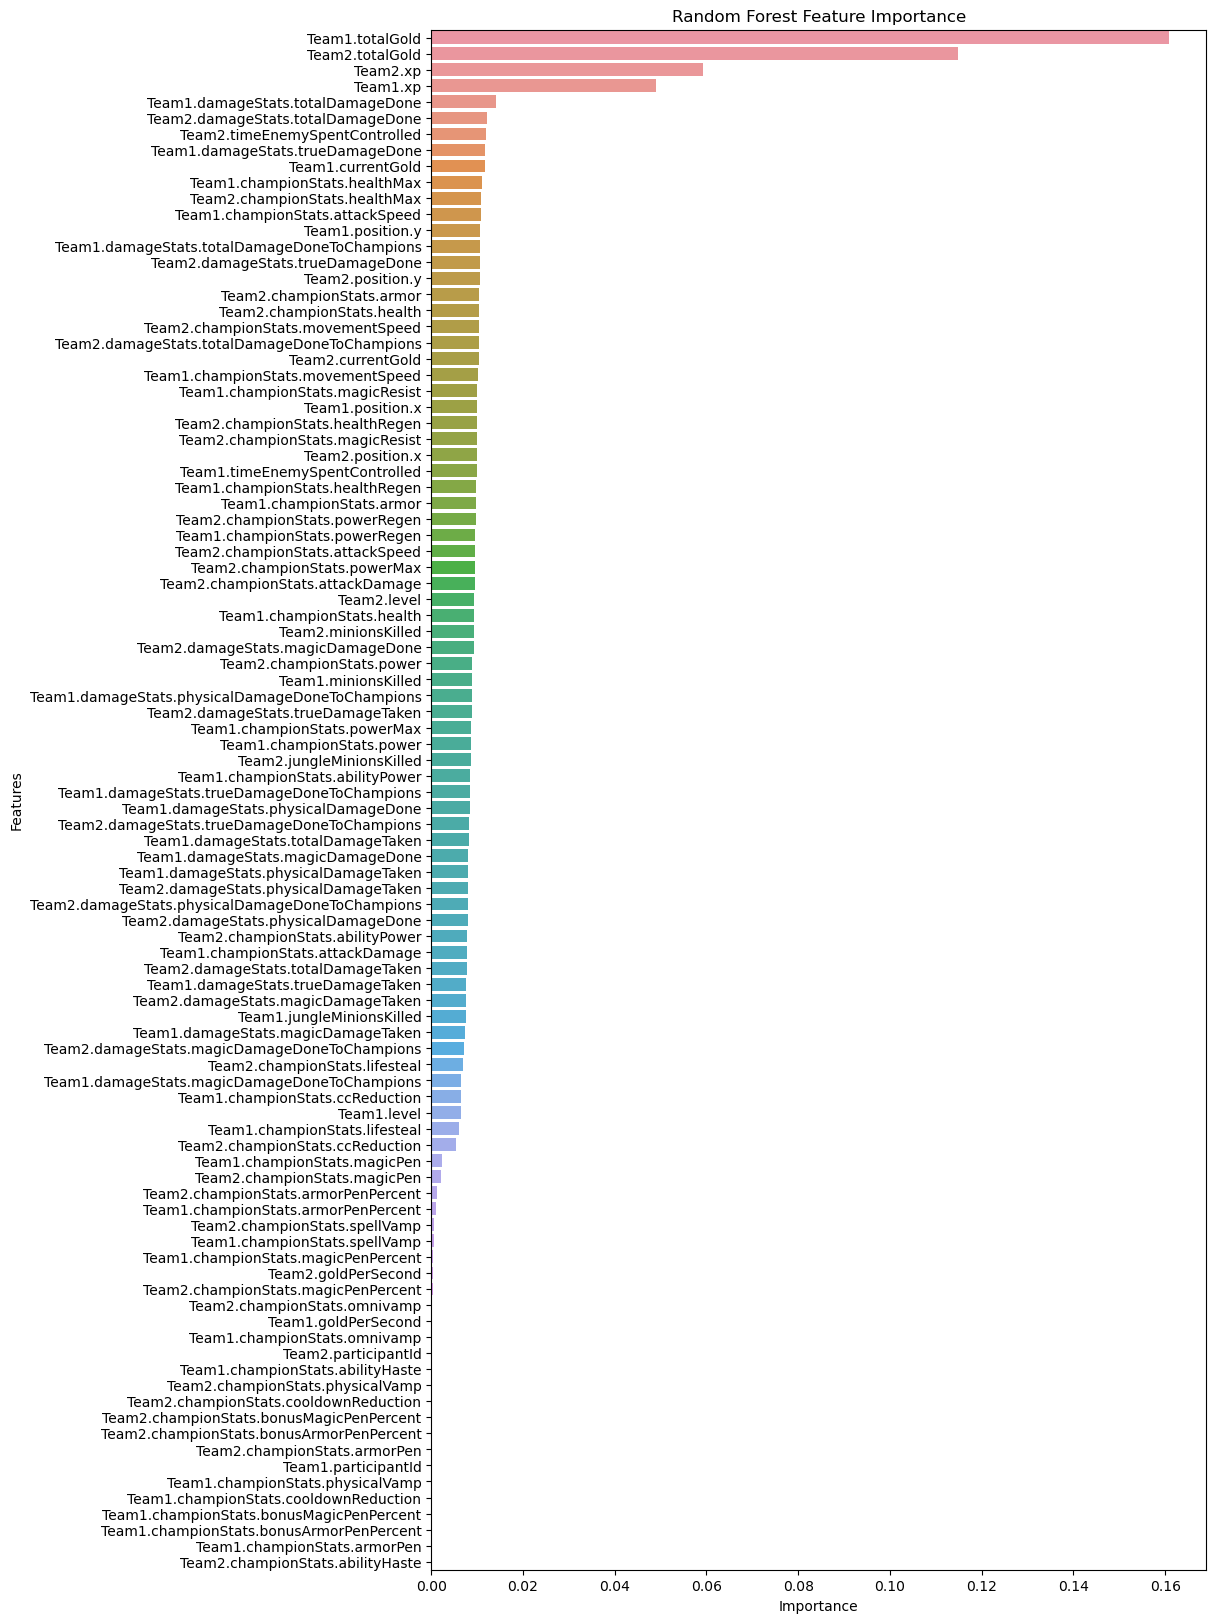

In [27]:
plot_feature_importances(rf.feature_importances_, X_test.columns, 'Random Forest')

# Observations sur l'importance des variables explicatives:

Selon la MDA par permutation, on vois que les golds et l'expérience sont les variables les plus importantes de notre modèle.

Cela semble logique car les golds permettent aux joueurs d'être plus puissant dans la partie et donc de prendre l'avantage sur leurs adveraires.
L'éxperience aussi car avec plus d'éxperience, on peut ameliorer les capacites de notre personnage, ce qui rend ces capacités plus puissantes et donc permette de prendre l'avantage sur les adversaires.

On voit aussi que les 20 dernières variables ne sont pas du tout corrélées avec la victoire. On pourrait dès maintenant les retirer.

# Sélection de variables et impact sur le temps:

Comme dit précédemment on pourrait choisir de supprimer au moins les dernières variables qui servent pour sur à rien à notre modèle mais on va automatiser la recherche de nombre de variables à retirer optimal pour avoir la meilleure précision. Pour cela on retira 1 puis 2 puis 3 variables de la moins importante à la plus importante pour conserver l'évolution de l'accuracy, du temps d'apprentissage et du temps d'inférence.

In [7]:
accuracys = []
fit_times = []
predict_times = []
for i in range(data.shape[1]):
    #suppression des colonnes de la moins importante à la plus importante selon la MDA faite auparavant
    to_remove = data.columns[sorted_idx[:i]]
    X_train_selected = X_train.drop(columns=to_remove)
    X_test_selected = X_val.drop(columns=to_remove)
    
    rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, n_jobs=-1)
    
    #fit et mesure du temps
    fit_start = time.time()
    rf.fit(X_train_selected, y_train)
    fit_end = time.time()
    
    #predict et mesure du temps
    predict_start = time.time()
    rf.predict(X_test_selected)
    predict_end = time.time()
    
    #ajout aux listes
    fit_times.append(fit_end - fit_start)
    predict_times.append(predict_end - predict_start)
    accuracys.append(cross_val_score(rf, X_test_selected, y_val, cv=3, n_jobs=-1).mean())

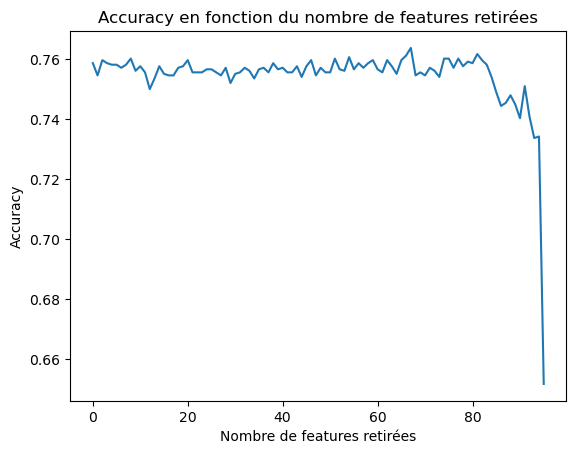

In [8]:
#On affiche le graphe de l'évolution de l'accuracy en fonction du nombre de features gardées
plt.plot(accuracys)
plt.xlabel('Nombre de features retirées')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction du nombre de features retirées')
plt.show()

Comme pressenti, on voit que l'accuracy est assez constante malgré les suppressions unes à unes des features. On observe un petit pic entre 50 et 60. On voit aussi l'importance des 4 variables qu'on observait sur notre le plot_features_importances de tout à l'heure.

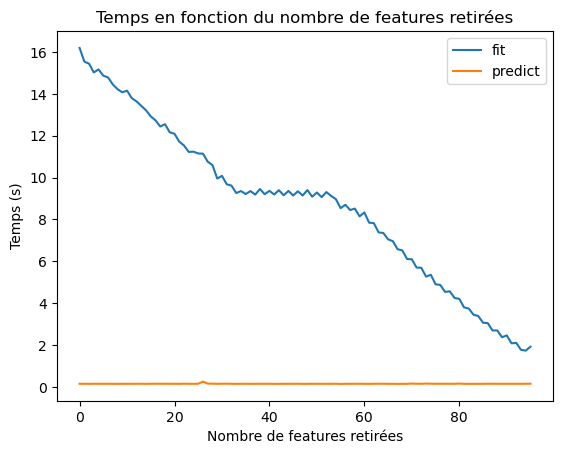

In [9]:
#display des temps
plt.plot(fit_times, label='fit')
plt.plot(predict_times, label='predict')
plt.xlabel('Nombre de features retirées')
plt.ylabel('Temps (s)')
plt.title('Temps en fonction du nombre de features retirées')
plt.legend()
plt.show()

Le temps de fit est décroissant de manière linéaire jusqu'à 60 features retirées suivi d'un plateau.
Le temps d'inférence semble être constant, donc on ne le prend pas en compte dans notre choix de features à retirer.
On aurait donc envie de créer un bon équilibre entre l'accuracy et le temps d'apprentissage. On a donc choisi de retirer les 55 features les plus inutiles. Ce qui nous conservera l'accuracy tout en passant de 20s d'apprentissage à ~5s

Pour s'en assurer, nous allons quand même moyenner ces prévisions sur 10 itérations afin de comparer les accuracys et les temps de calcul entre un modèle avec toutes les features et l'autre avec les 55 en moins

In [10]:
to_remove = data.columns[sorted_idx[:55]]
X_train_selected = X_train.drop(columns=to_remove)
X_test_selected = X_test.drop(columns=to_remove)

In [11]:
train_time_selected = 0
train_time = 0
for i in range(10):
    rf_selected = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
    rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)

    train_time_start_selected = time.time() 
    rf_selected.fit(X_train_selected, y_train)
    train_time_end_selected = time.time()

    train_time_start = time.time()
    rf.fit(X_train, y_train)
    train_time_end = time.time()

    train_time_selected += train_time_end_selected - train_time_start_selected
    train_time += train_time_end - train_time_start

In [12]:
print(f"Temps d'apprentissage avec selection de variables explicatives: {train_time_selected/10:.2f} secondes en moyenne")
print(f"Temps d'apprentissage sans selection de variables explicatives: {train_time/10:.2f} secondes en moyenne")
print(f"L'apprentissage avec selection de variables explicatives se fait en {100*train_time_selected/train_time:.2f} % du temps d'apprentissage sans selection de variables explicatives." )

Temps d'apprentissage avec selection de variables explicatives: 9.33 secondes en moyenne
Temps d'apprentissage sans selection de variables explicatives: 17.09 secondes en moyenne
L'apprentissage avec selection de variables explicatives se fait en 54.60 % du temps d'apprentissage sans selection de variables explicatives.


Ensuite on compare le temps d'inference des deux forets aleatoires en moyennant sur 100 iterations:

In [ ]:
rf_selected = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf_selected.fit(X_train_selected, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, n_estimators=1500, n_jobs=-1,
                       oob_score=True, random_state=42)

In [ ]:
predict_time_selected = 0
predict_time = 0

for i in range(100):

    predict_time_start_selected = time.time()
    rf_selected.predict(X_test_selected)
    predict_time_end_selected = time.time()

    predict_time_start = time.time()
    rf.predict(X_test)
    predict_time_end = time.time()

    predict_time_selected += predict_time_end_selected - predict_time_start_selected
    predict_time += predict_time_end - predict_time_start

NameError: name 'X_test_selected' is not defined

In [ ]:
print(f"Temps d'apprentissage avec selection de variables explicatives: {predict_time_selected/10:.2f} secondes en moyenne")
print(f"Temps d'apprentissage sans selection de variables explicatives: {predict_time/10:.2f} secondes en moyenne")
print(f"L'apprentissage avec selection de variables explicatives se fait en {100*predict_time_selected/predict_time:.2f} % du temps d'apprentissage sans selection de variables explicatives." )

Temps d'apprentissage avec selection de variables explicatives: 4.01 secondes en moyenne
Temps d'apprentissage sans selection de variables explicatives: 4.04 secondes en moyenne
L'apprentissage avec selection de variables explicatives se fait en 99.26 % du temps d'apprentissage sans selection de variables explicatives.


# Impact de la sélection de variables sur le temps:

On voit qu'il y a un gain de temps considerable sur le temps d'apprentissage lorsque l'on enleve les variables les moins importantes.

Le temps d'apprentissage apres la selection de variables explicatives est a peu pres 7.5 fois plus petit que celui sans la selection.

Regardant le temps d'inference cependant, on voit que la selection de variable n'a pas d'impact.

On peut en conclure que le gain de temps est non negligeable, surtout durant l'etape d'apprentissage.


# Comparaison des performances de test:

On va desormais comparer nos 2 forets aleatoires sur le jeu de donnees test.

In [39]:
rf_selected = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf_selected.fit(X_train_selected, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, n_estimators=1500, n_jobs=-1,
                       oob_score=True, random_state=42)

In [40]:
score_select = cross_val_score(rf_selected, X_test_selected, y_test, scoring="accuracy", cv = 10)
score = cross_val_score(rf, X_test, y_test, scoring="accuracy", cv = 10)

In [41]:
print(f"Precision avec selection de variable: {score_select.mean():.2f}")
print(f"Precision sans selection de variable: {score.mean():.2f}")

Precision avec selection de variable: 0.75
Precision sans selection de variable: 0.76


# Impact de la selection de variables sur les performances:

On voit qu'en sélectionnant les variables explicatives les plus importantes, on garde de bonne performances sur notre jeu de données test.

# Jalon 4 : GRADIENT BOOSTING

On va utiliser un Gradient Boosting Classifier.

Cet algorithme créer de façon séquentielle des arbres de décisions.

Chacun de ces arbres est peu profond et va sous-apprendre les donées.

De plus, chaque arbres créés va prédire l'erreur (négative) des modèles précédents ce qui va corriger le sous-apprentissage du modèle d'ensemble.

On peut l'utiliser dans notre cas car nous avant moins de 10000 matchs dans notre jeu de données.

On n'utilise pas la version avec les histogrammes car le temps de calcul n'est pas un problème.

Les principaux hyper-paramètres sont n_estimators, learning_rate, max_depth, subsample , max_features.

-n_estimators: le nombre d'arbres dans notre ensemble.

-learning_rate: gère la contribution de chaque arbres dans l'ensemble.

-subsample: la fraction des données à prendre en compte pour l'apprentissage de chaque arbres.

-max_features: le nombre de variables considérées lors de chaque coupure.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv('data_15min_final.csv')
target = data['winningTeam']
data.drop(columns='winningTeam', inplace=True)

In [4]:
X_trainval, X_test, y_trainval, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.25, random_state=42)


In [15]:
#Implémentation de gradient boosting tree
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(random_state=42)
boost.fit(X_train, y_train)
print(f"Accuracy : {boost.score(X_test, y_test)*100:.2f}%")

Accuracy : 75.81%


Accuracy de 75.81% sans tuning, on va voir comme ça évolue avec une simple grid search

In [5]:
params = {'n_estimators': [100, 500, 1000, 1500, 2000],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9],
            'subsample': [0.5, 0.75, 1.0],
            'max_features': [0.5, 0.75, 1.0]}
grid_search = RandomizedSearchCV(boost, param_distributions=params, n_iter=100, scoring='accuracy', cv=2, n_jobs=-1, random_state=42, verbose=1)

In [6]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'max_features': [0.5, 0.75, 1.0],
                                        'n_estimators': [100, 500, 1000, 1500,
                                                         2000],
                                        'subsample': [0.5, 0.75, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [7]:
grid_search.best_params_

{'subsample': 0.75,
 'n_estimators': 500,
 'max_features': 0.5,
 'max_depth': 5,
 'learning_rate': 0.01}

In [8]:
grid_search.best_score_

0.7609507640067912

On a récupéré nos 76,1% d'accuracy.

In [16]:

params = {'n_estimators': [300, 400, 450, 500, 550, 600, 700],
            'learning_rate': [0.001, 0.005, 0.01, 0.03],
            'max_depth': [4, 5, 6, 7],
            'subsample': [0.7, 0.75, 0.8],
            'max_features': [0.3, 0.4, 0.5, 0.55]}

In [17]:
grid_search = RandomizedSearchCV(boost, param_distributions=params, n_iter=100, scoring='accuracy', cv=2, n_jobs=-1, random_state=42, verbose=1)

In [18]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.03],
                                        'max_depth': [4, 5, 6, 7],
                                        'max_features': [0.3, 0.4, 0.5, 0.55],
                                        'n_estimators': [300, 400, 450, 500,
                                                         550, 600, 700],
                                        'subsample': [0.7, 0.75, 0.8]},
                   random_state=42, scoring='accuracy', verbose=1)

In [19]:
grid_search.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'max_features': 0.55,
 'max_depth': 6,
 'learning_rate': 0.01}

In [20]:
grid_search.best_score_

0.762461262607683

On precise les hyperparametres.
On confirme notamment le sub sample et n_estimators.

In [23]:
params_distri = {'n_estimators': [200, 250, 300, 350, 400],
            'learning_rate': [0.01],
            'max_depth': [5, 6, 7],
            'subsample': [0.6, 0.65, 0.7, 0.75],
            'max_features': [0.5, 0.55, 0.6]}
rand_search = RandomizedSearchCV(boost, param_distributions=params_distri, n_iter=100, scoring='accuracy', cv=2, n_jobs=-1, random_state=42, verbose=1)

In [24]:
rand_search.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [0.5, 0.55, 0.6],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400],
                                        'subsample': [0.6, 0.65, 0.7, 0.75]},
                   random_state=42, scoring='accuracy', verbose=1)

In [26]:
rand_search.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'max_features': 0.55,
 'max_depth': 6,
 'learning_rate': 0.01}

In [28]:
rand_search.best_score_

0.762461262607683

On est donc assez confiant en notre calibrage d'hyperparamètres et on peut faire une première évaluation sur notre jeu de données test.

In [7]:
gdb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=6, subsample=0.7, max_features=0.55, random_state=42)
gdb.fit(X_train, y_train)
print(f"Accuracy : {gdb.score(X_test, y_test)*100:.2f}%")

Accuracy : 75.81%


On peut ensuite faire l'importance des features pour retirer celle qui pourraient pertuber l'apprentissage:

In [8]:
result = permutation_importance(gdb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

In [9]:
sorted_idx

array([ 9, 76, 39, 79, 82, 66, 35, 41, 28, 47, 54, 36, 91, 78, 75, 49, 63,
       53, 74, 81, 88, 52, 25, 69,  2, 60, 92, 21, 27, 37, 70,  1, 18, 11,
       51, 68, 56, 58, 64, 67, 86, 87, 90, 55, 48,  0, 19,  7,  8, 10, 14,
       16,  4, 24, 20,  3, 42, 38, 80, 15, 72, 71, 62, 44, 93, 29, 73, 31,
       50, 17, 26, 59, 34, 57, 40, 83, 33, 32, 43, 23, 22, 89, 13, 77, 85,
       65,  5, 61,  6, 30, 45, 84, 12, 95, 94, 46], dtype=int64)

On enlève les 20 variables explicatives les moins importantes pour que notre modèle ne se base pas dessus durant l'apprentissage.

In [10]:
to_remove = data.columns[sorted_idx[:20]]
X_train_selected = X_train.drop(columns=to_remove)
X_test_selected = X_test.drop(columns=to_remove)

In [11]:
gdbSelected = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=6, subsample=0.7, max_features=0.55, random_state=42)
gdbSelected.fit(X_train_selected, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.55,
                           n_estimators=300, random_state=42, subsample=0.7)

In [12]:
gdbSelected.score(X_test_selected, y_test)

0.7566191446028513

In [13]:
score_select = cross_val_score(gdbSelected, X_test_selected, y_test, scoring="accuracy", cv = 10)

In [14]:
print(f"Precision avec selection de variable: {score_select.mean():.2f}")

Precision avec selection de variable: 0.76


On va maintenant conmparer avec la regression logistique et la foret aleatoire, toutes deux calibrees:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

to_remove = data.columns[sorted_idx[:20]]
X_train_selected = X_train.drop(columns=to_remove)
X_test_selected = X_test.drop(columns=to_remove)


lr = make_pipeline(StandardScaler(), LogisticRegression(C=0.25, penalty='l2', max_iter=500, random_state=42)) #Create a pipeline with a standard scaler and a logistic regression
rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
gdb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=6, subsample=0.7, max_features=0.55, random_state=42)

lr.fit(X_train_selected, y_train)
rf.fit(X_train_selected, y_train)
gdb.fit(X_train_selected, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.55,
                           n_estimators=300, random_state=42, subsample=0.7)

In [16]:
lr_score = cross_val_score(lr, X_test_selected, y_test, scoring="accuracy", cv = 10)
rf_score = cross_val_score(rf, X_test_selected, y_test, scoring="accuracy", cv = 10)
gdb_score = cross_val_score(gdb, X_test_selected, y_test, scoring="accuracy", cv = 10)

In [17]:
print(f"Precision avec selection de variable: {lr_score.mean()}")
print(f"Precision avec selection de variable: {rf_score.mean()}")
print(f"Precision avec selection de variable: {gdb_score.mean()}")

Precision avec selection de variable: 0.756104319900549
Precision avec selection de variable: 0.7545762975240858
Precision avec selection de variable: 0.7586398010981042


On voit que le gradient boosting généralise un peu mieux que nos deux autres modèles.


Si on devait conseiller une entreprise sur quel modèle utiliser, si on ne se base que sur les performances de généralisation, on conseillerait le gradient boosting qui semble un peu plus performant.
Cependant, peut-être que les performances en temps sont importantes, donc on va faire un dernier test pour comparer le temps de prédiction de chaque modèle.

In [21]:
import time

lr_pred_start = time.time()
lr_score = cross_val_score(lr, X_test_selected, y_test, scoring="accuracy", cv = 10)
lr_pred_end = time.time()

rf_pred_start = time.time()
rf_score = cross_val_score(rf, X_test_selected, y_test, scoring="accuracy", cv = 10)
rf_pred_end = time.time()

gdb_pred_start = time.time()
gdb_score = cross_val_score(gdb, X_test_selected, y_test, scoring="accuracy", cv = 10)
gdb_pred_end = time.time()

lr_pred_time = lr_pred_end - lr_pred_start
rf_pred_time = rf_pred_end - rf_pred_start
gdb_pred_time = gdb_pred_end - gdb_pred_start


Temps de predictions: 34.04 65.52 0.17


In [27]:
print(f"Temps de predictions: Régression logistique : {lr_pred_time:.2f}s, RandomForest : {rf_pred_time:.2f}s, Gradient boosting : {gdb_pred_time:.2f}s")

Temps de predictions: Régression logistique : 0.17s, RandomForest : 65.52s, Gradient boosting : 34.04s



On voit que la régression logistique prédit bien plus vite que les deux autres modèles donc si l'entreprise doit prédire sur un grand volume de données et fréquemment, alors on conseillerait celle-ci.

On notera tout de même que le gradient boosting est plus rapide que la forêt aléatoire; cela s'explique par le fait que prédire avec un arbre peu profond est plus rapide que de prédire avec un arbres profond.


# Si on avait 3 mois de plus...

### Au niveau du dataset :

- **Enrichissement en statistiques brutes** :
    - Ajouter les champions, les rôles, etc. Cela permettrait de voir des synergies, des contres et potentiellement améliorer les prédictions.
    - Il faudra retirer les personnages très peu joués et effectuer un encodage one hot, ce qui nous ajouterait environ 150 * 10 colonnes à notre dataset : reste à voir si cela en vaut la peine.

- **Enrichissement en statistiques 'externes'** :
    - Inclure le taux de victoire des autres joueurs de la partie ainsi que le taux de victoire des champions de la partie sur la mise à jour actuelle.

- Actuellement, on traite les données à l'instant T = 15 min. On pourrait prendre d'autres timers pour affiner les prédictions. Il ne faut pas prendre trop tard, car comme on l'a vu au début de notre projet, League of Legends est un jeu à effet boule de neige et on monte vite vers les 100% de bonnes réponses.

### Au niveau de l'apprentissage :

- Regarder les features interaction : cela nous permettrait de mieux comprendre les relations entre nos features. On est en plus sûr d'en avoir ici : l'xp donne des statistiques, tout comme les golds (ce n'est pas pour rien que ce sont les deux variables les plus importantes selon la MDA).

- Ajouter des données à d'autres timestamps de partie : on pourrait potentiellement créer des features = différence de stats entre les moments (ex : différence de gold entre 10 et 10 minutes pour voir l'accélération de la partie).

- Mieux généraliser les tests en bouclant / nested grid search, etc.

- Il y a d'autres modèles de classification (SVM, KNN, Naive Bayes etc..) qu'on n'a pas pu tester.
